<a href="https://colab.research.google.com/github/peixuanyap/Predicting-Life-Expectancy/blob/main/WIE2003_GroupAssignment_Group15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## WIE2003 Introduction to Data Science Group Assignment

##**Predicting Life Expectancy Using Health and Socioeconomic Factors**

Group Member:

1. Yap Pei Xuan (23005028)
2. Wendy Tang Yuh Wei (23004911)
3. Tey Zi Ying (23004929)
4. Lau Duan Hang (23005003)
5. Ooi Yu Lik (23056955)
6. Yap Rou Yi (23005004)



This project aims to analyze and model the factors influencing life expectancy using global health and economic data from the World Health Organization (WHO) and United Nations. By examining data from 193 countries spanning 2000 to 2015 we explore how indicators such as immunization rates, education levels, income composition, and healthcare infrastructure correlate with and predict life expectancy outcomes. The insights derived from this analysis are intended to inform evidence-based policymaking, support SDG 3 (Good Health and Well-Being), and guide international health organizations in targeting key areas for intervention.



# 1.0 Loading Dataset

The dataset is imported using Kaggle's dataset API. The file is a CSV that contains data about life expectancy, along with health and socioeconomic factors across different countries and years.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform, randint
from sklearn.impute import SimpleImputer
from sklearn.exceptions import ConvergenceWarning
from scipy.stats import shapiro
from itertools import cycle

In [ ]:
import kagglehub
kumarajarshi_life_expectancy_who_path = kagglehub.dataset_download('kumarajarshi/life-expectancy-who')

print('Data source import complete.')

Data source import complete.


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/life-expectancy-who/Life Expectancy Data.csv


In [ ]:
df=pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')
df.columns = df.columns.str.strip()

# 2.0 Initial Data Exploration
This section explores the basic structure of the data, checking its shape (number of rows and columns), data types, and displays some initial records. It also summarizes the data using .info() and .describe().


In [ ]:
df.head()
print(df.shape)
df.info()

(2938, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio    

In [ ]:
df.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

#3.0 Data Cleaning
Data cleaning is a crucial step in the data preparation process, ensuring that the dataset is accurate, complete, and consistent. This section focuses on handling missing values, duplicates, and outliers in the dataset. Missing numerical data is filled with the median values, and unnecessary columns or rows are dropped.



## 3.1 Missing Values

Missing values in the dataset are identified using df.isna().sum(), which returns the number of missing values in each column. For numerical columns with missing values, imputation is applied to fill them with the median value. Median imputation is preferred because it is more robust to outliers compared to mean imputation. For categorical columns, the mode (most frequent value) is used to replace missing values, ensuring that the categorical nature of the data is preserved.

In [ ]:
print(df.isna().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


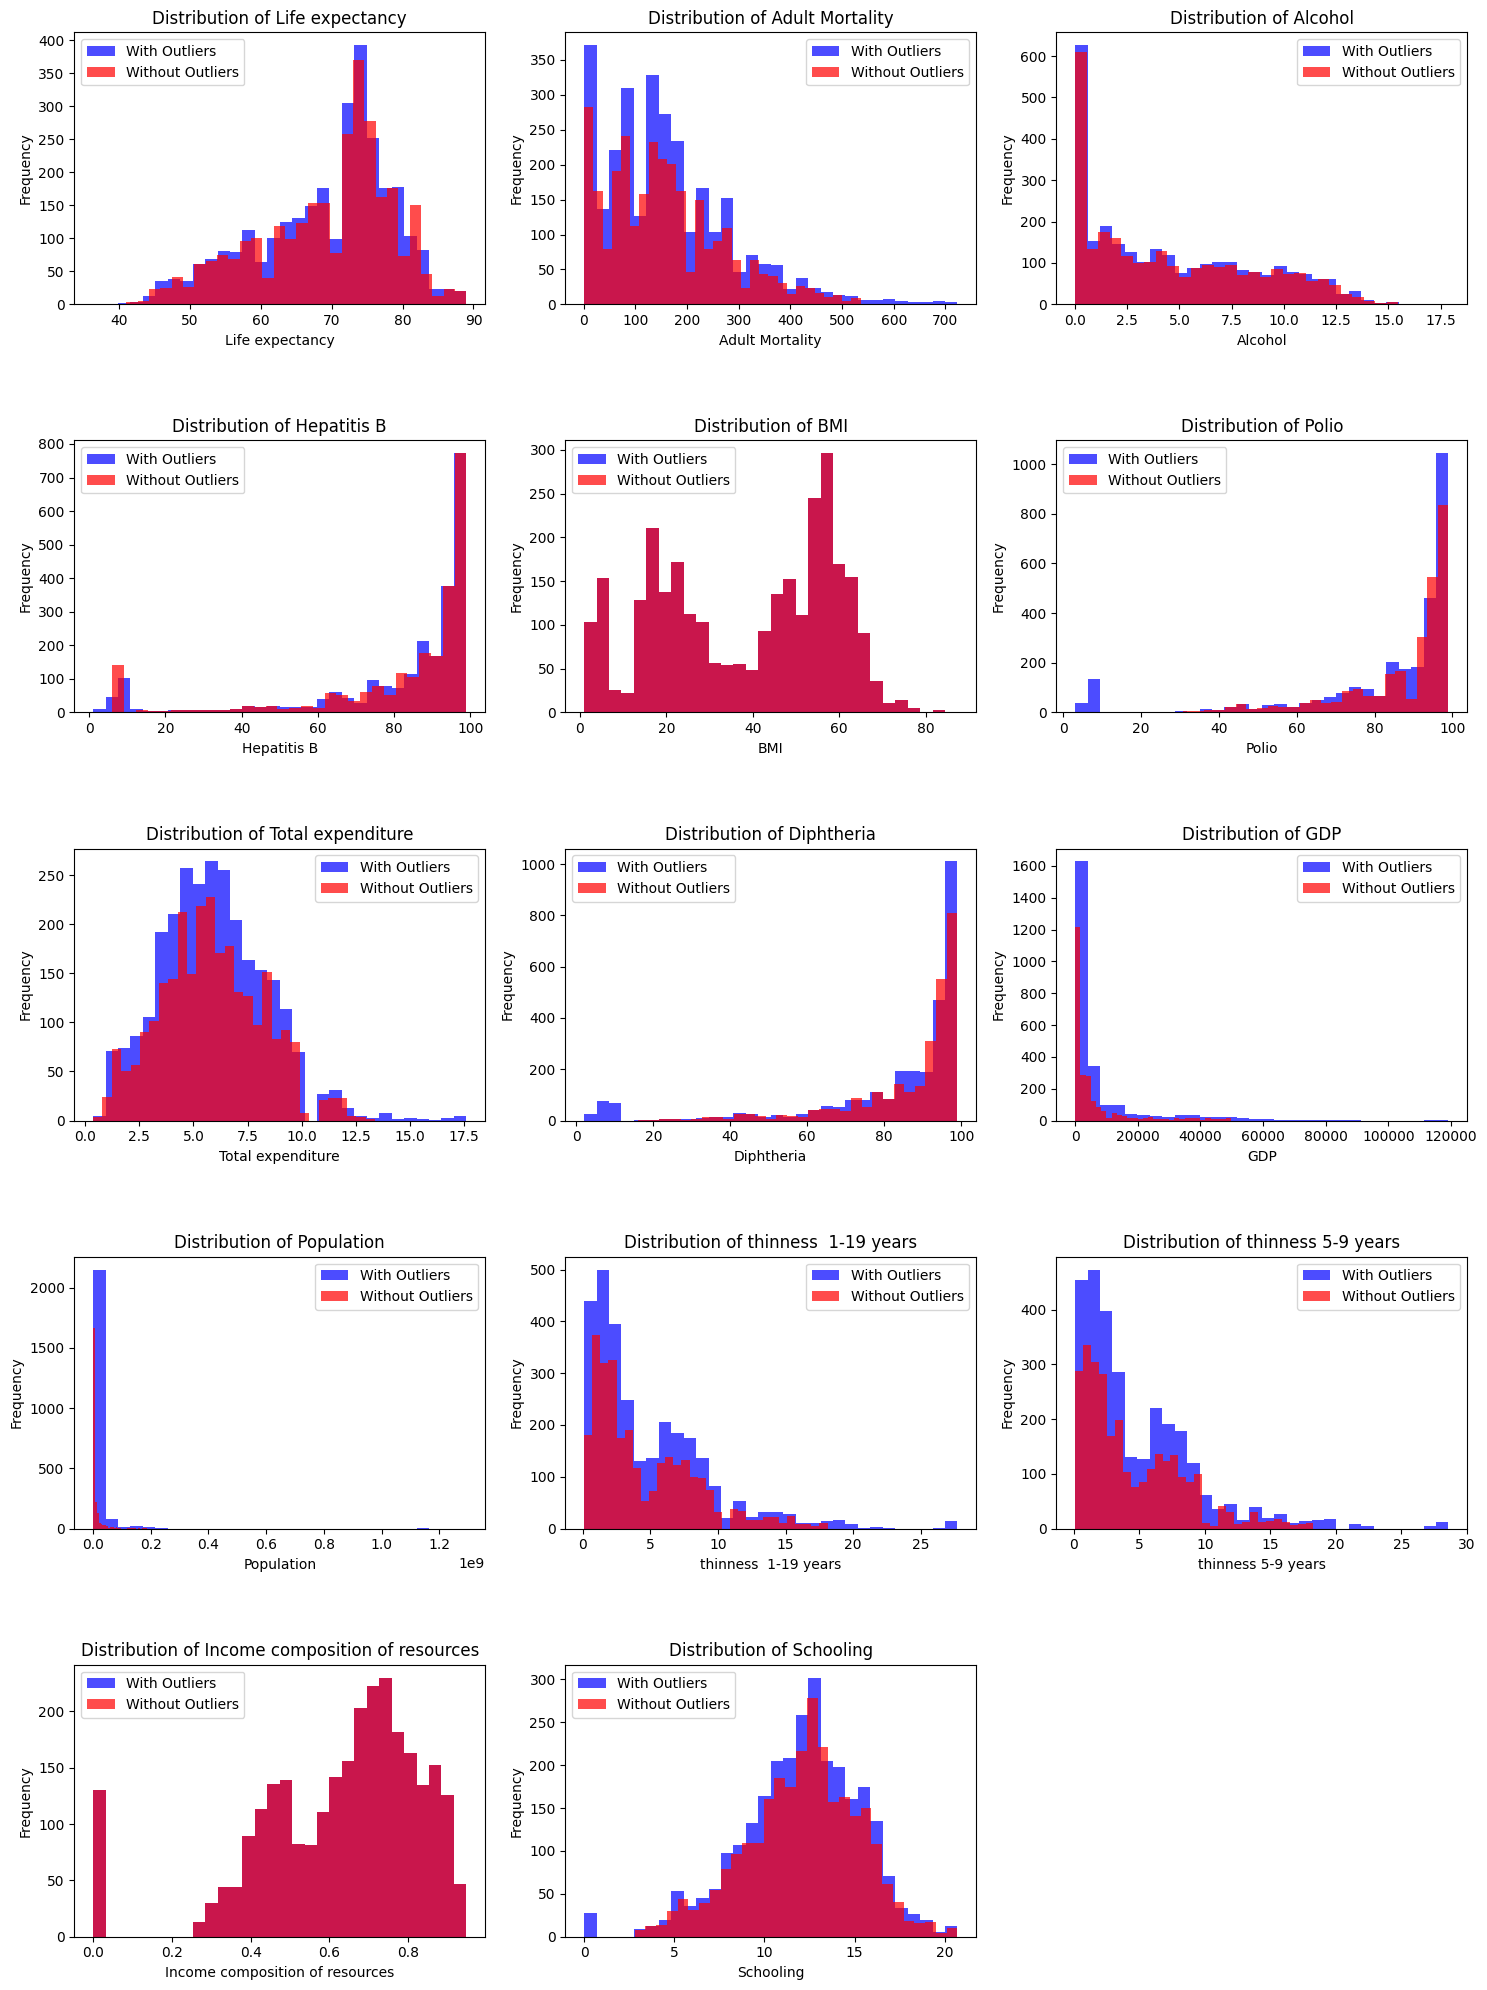


Column: Life expectancy
Mean Performance:
 69.22493169398908

Median Performance:
 72.1

Column: Adult Mortality
Mean Performance:
 164.79644808743168

Median Performance:
 144.0

Column: Alcohol
Mean Performance:
 4.602860787172012

Median Performance:
 3.755

Column: Hepatitis B
Mean Performance:
 80.94046121593291

Median Performance:
 92.0

Column: BMI
Mean Performance:
 38.321246556473824

Median Performance:
 43.5

Column: Polio
Mean Performance:
 82.55018842069202

Median Performance:
 93.0

Column: Total expenditure
Mean Performance:
 5.9381895280235995

Median Performance:
 5.755

Column: Diphtheria
Mean Performance:
 82.32408359027065

Median Performance:
 93.0

Column: GDP
Mean Performance:
 7483.158469138474

Median Performance:
 1766.947595

Column: Population
Mean Performance:
 12753375.120052494

Median Performance:
 1386542.0

Column: thinness  1-19 years
Mean Performance:
 4.839703856749312

Median Performance:
 3.3

Column: thinness 5-9 years
Mean Performance:
 4.870

In [ ]:
columns_to_check = [
    'Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'BMI', 'Polio',
    'Total expenditure', 'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years',
    'thinness 5-9 years', 'Income composition of resources', 'Schooling'
]

results = {}

num_columns = 3
num_rows = (len(columns_to_check) + 1) // num_columns

plt.figure(figsize=(15, 4 * num_rows))

for i, column in enumerate(columns_to_check):
    mean_value = df[column].mean()
    median_value = df[column].median()

    z_scores = (df[column] - mean_value) / df[column].std()
    outliers = df[(z_scores > 3) | (z_scores < -3)]

    results[column] = {
        'Mean': mean_value,
        'Median': median_value
    }

    plt.subplot(num_rows, num_columns, i + 1)
    plt.hist(df[column], bins=30, alpha=0.7, label='With Outliers', color='blue')
    plt.hist(df[~df.index.isin(outliers.index)][column], bins=30, alpha=0.7, label='Without Outliers', color='red')
    plt.title(f'Distribution of {column.strip()}')
    plt.xlabel(column.strip())
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

for column, result in results.items():
    print(f"\nColumn: {column}")
    print("Mean Performance:\n", result['Mean'])
    print("\nMedian Performance:\n", result['Median'])

In [ ]:
# Impute numerical columns with the median
imputer = SimpleImputer(strategy='median')
df[columns_to_check] = imputer.fit_transform(df[columns_to_check])

# Impute categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

In [ ]:
print("\nInput missing numerical data with median value:")
print(df.isna().sum())


Input missing numerical data with median value:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


In [ ]:
# Removed BMI column due to high proportion of anomalies

df.drop(columns=['BMI'], inplace=True)

In [ ]:
print("\nRemaining missing values:\n", df.isna().sum().sum())
print("\nCleaned dataframe shape:", df.shape)
print(df.info())


Remaining missing values:
 0

Cleaned dataframe shape: (2938, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  under-five deaths                2938 non-null   int64  
 11  Polio          

## 3.2 Duplicates
Duplicate rows in the dataset can distort analysis and model predictions. To handle duplicates, the number of duplicate rows is determined using df.duplicated().sum(). If any duplicates are found, they can be removed using df.drop_duplicates().

In [ ]:
print(f'The number of duplicated row is {df.duplicated().sum()}')

The number of duplicated row is 0


## 3.3 Handling Outliers

Outlier detection was performed using the Interquartile Range (IQR) method which is suitable for datasets with skewed distributions. Since many of the features in the dataset are not normally distributed, the IQR approach was chosen over mean-based methods to ensure robustness against extreme values.

To visually support the identification of these outliers, boxplots were used. Boxplots illustrate the distribution, median and potential outliers clearly. This visual representation confirmed the presence of outliers in several skewed features.

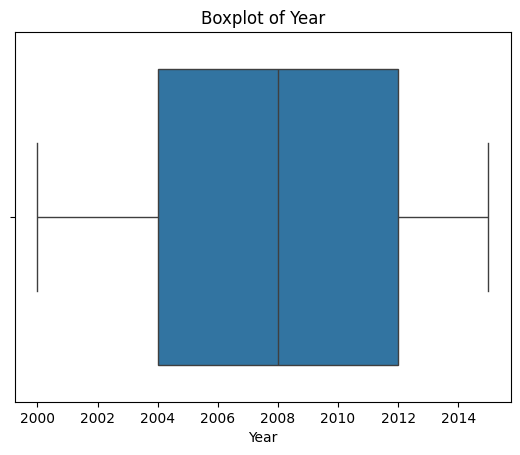

Year - Skewness: -0.006
Year - Skewness Interpretation: Approximately symmetric
Year - Outliers detected: 0



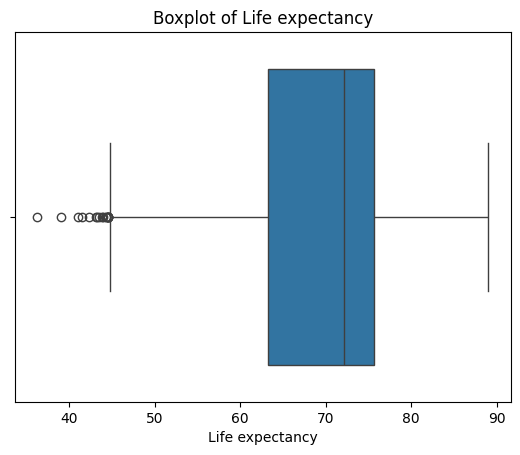

Life expectancy - Skewness: -0.642
Life expectancy - Skewness Interpretation: Moderately left-skewed
Life expectancy - Outliers detected: 17



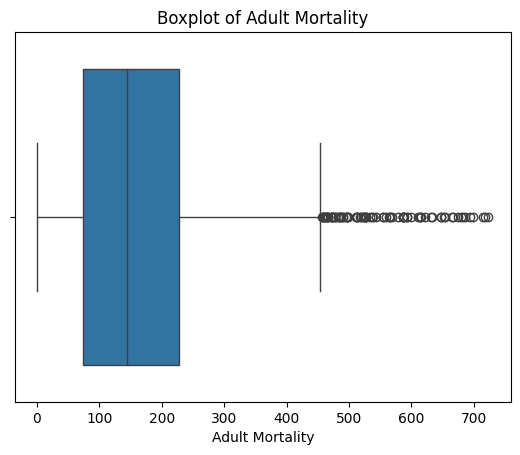

Adult Mortality - Skewness: 1.178
Adult Mortality - Skewness Interpretation: Highly right-skewed
Adult Mortality - Outliers detected: 86



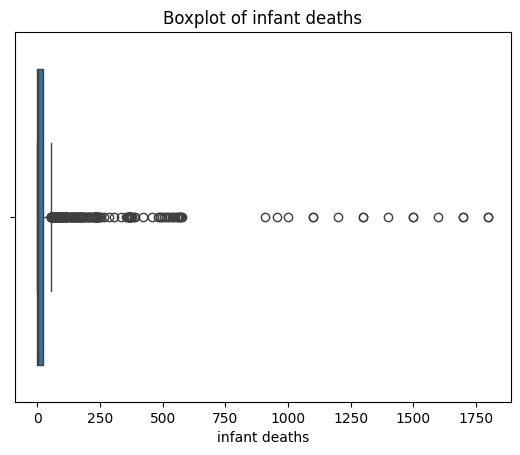

infant deaths - Skewness: 9.787
infant deaths - Skewness Interpretation: Highly right-skewed
infant deaths - Outliers detected: 315



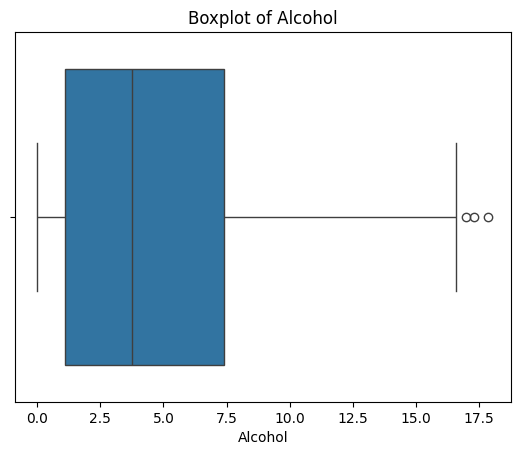

Alcohol - Skewness: 0.650
Alcohol - Skewness Interpretation: Moderately right-skewed
Alcohol - Outliers detected: 3



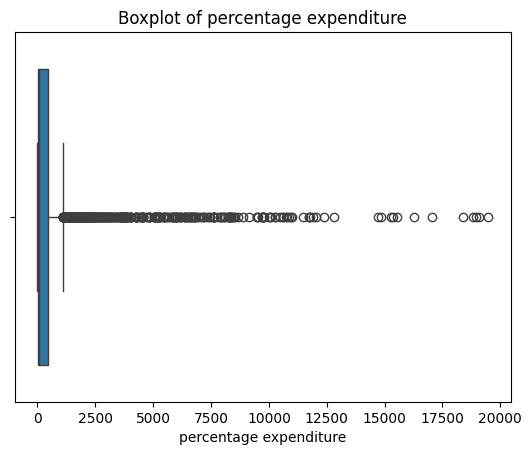

percentage expenditure - Skewness: 4.652
percentage expenditure - Skewness Interpretation: Highly right-skewed
percentage expenditure - Outliers detected: 389



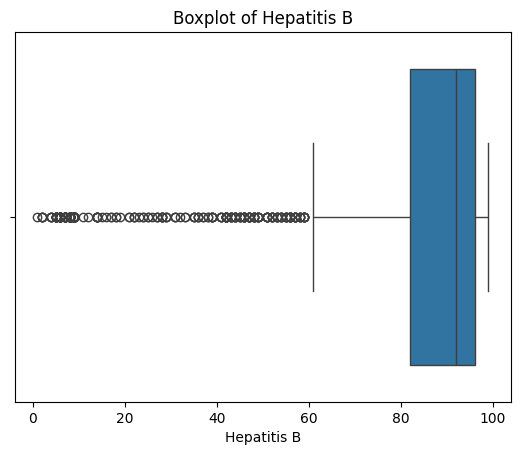

Hepatitis B - Skewness: -2.282
Hepatitis B - Skewness Interpretation: Highly left-skewed
Hepatitis B - Outliers detected: 322



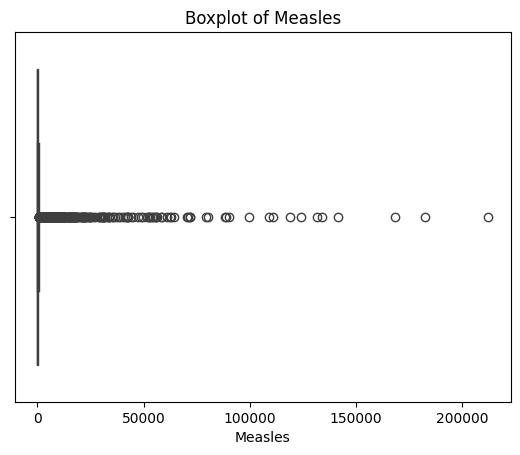

Measles - Skewness: 9.441
Measles - Skewness Interpretation: Highly right-skewed
Measles - Outliers detected: 542



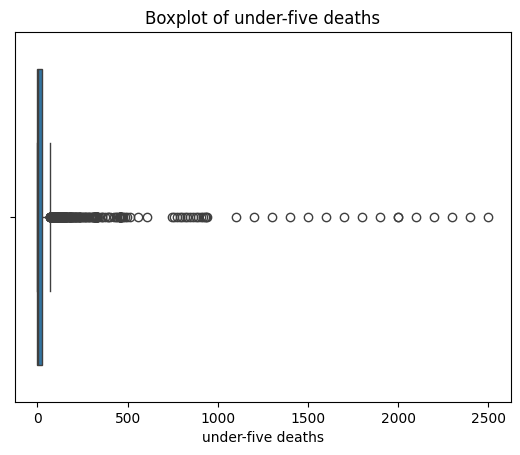

under-five deaths - Skewness: 9.495
under-five deaths - Skewness Interpretation: Highly right-skewed
under-five deaths - Outliers detected: 394



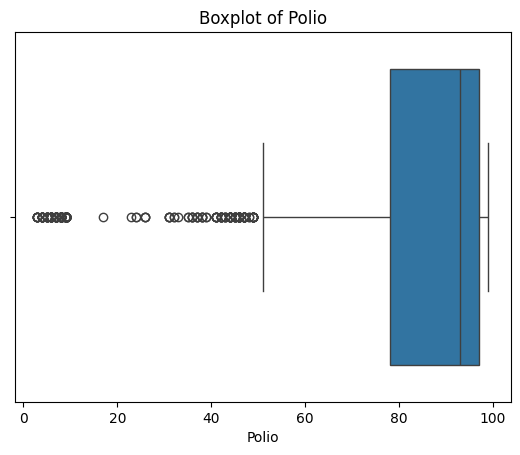

Polio - Skewness: -2.109
Polio - Skewness Interpretation: Highly left-skewed
Polio - Outliers detected: 279



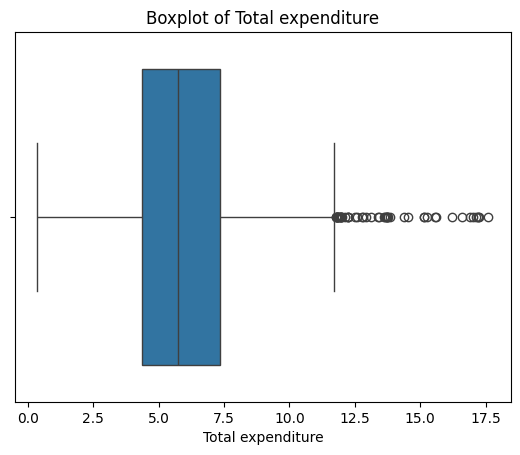

Total expenditure - Skewness: 0.661
Total expenditure - Skewness Interpretation: Moderately right-skewed
Total expenditure - Outliers detected: 51



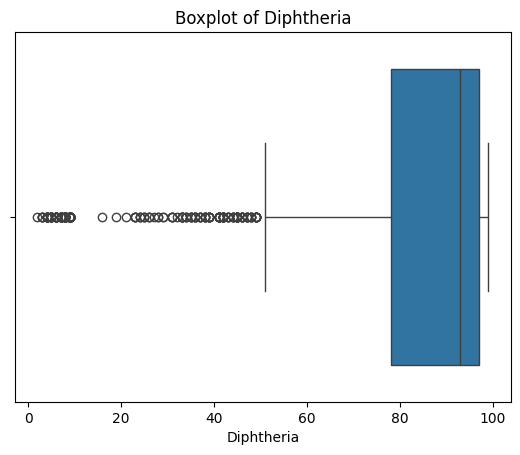

Diphtheria - Skewness: -2.084
Diphtheria - Skewness Interpretation: Highly left-skewed
Diphtheria - Outliers detected: 298



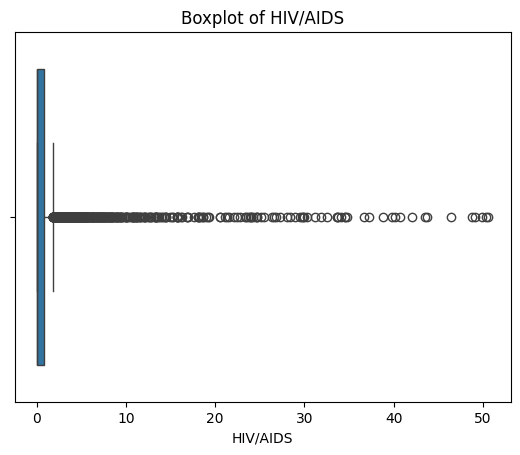

HIV/AIDS - Skewness: 5.396
HIV/AIDS - Skewness Interpretation: Highly right-skewed
HIV/AIDS - Outliers detected: 542



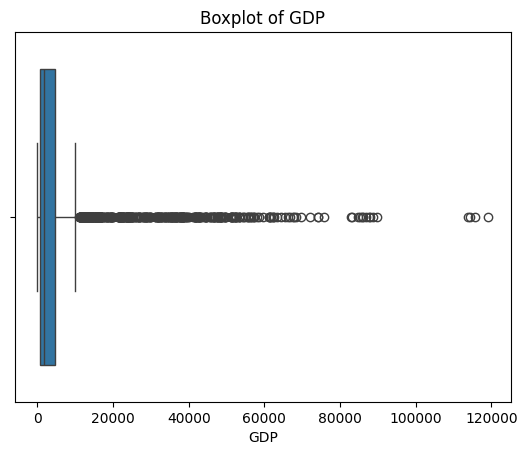

GDP - Skewness: 3.544
GDP - Skewness Interpretation: Highly right-skewed
GDP - Outliers detected: 445



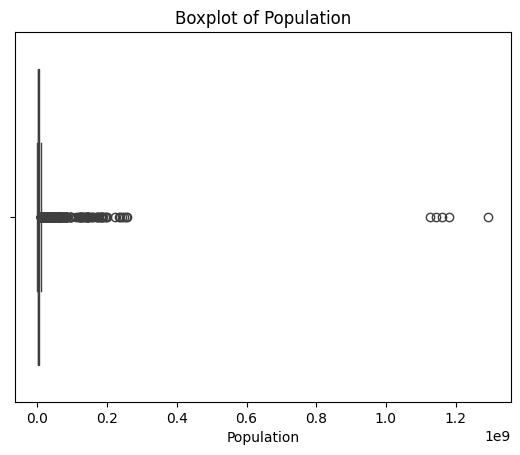

Population - Skewness: 17.973
Population - Skewness Interpretation: Highly right-skewed
Population - Outliers detected: 452



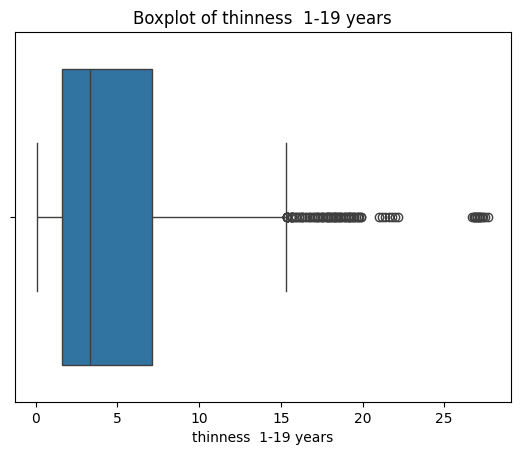

thinness  1-19 years - Skewness: 1.729
thinness  1-19 years - Skewness Interpretation: Highly right-skewed
thinness  1-19 years - Outliers detected: 100



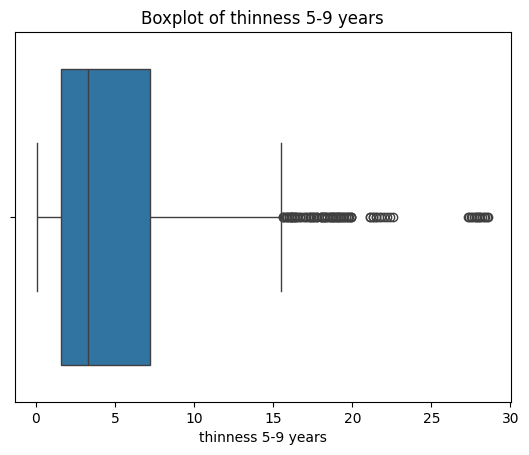

thinness 5-9 years - Skewness: 1.796
thinness 5-9 years - Skewness Interpretation: Highly right-skewed
thinness 5-9 years - Outliers detected: 99



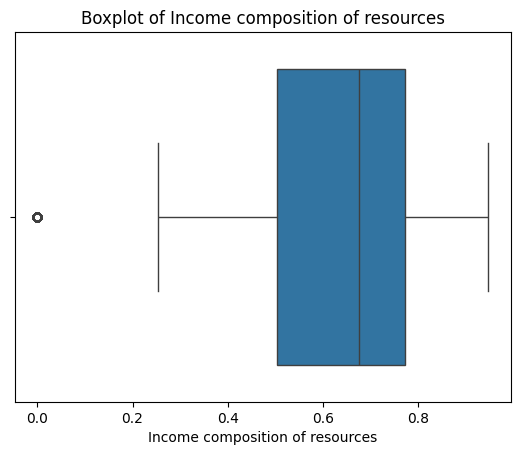

Income composition of resources - Skewness: -1.213
Income composition of resources - Skewness Interpretation: Highly left-skewed
Income composition of resources - Outliers detected: 130



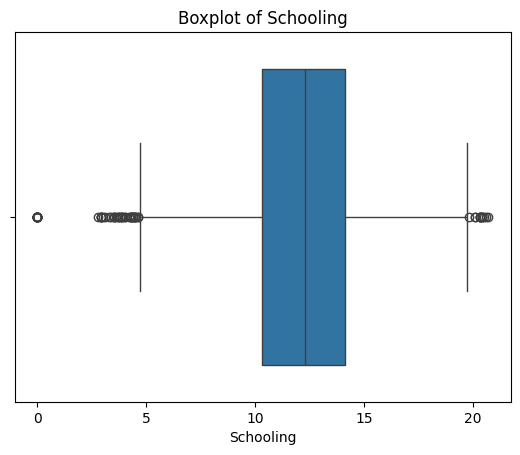

Schooling - Skewness: -0.635
Schooling - Skewness Interpretation: Moderately left-skewed
Schooling - Outliers detected: 77



In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

    skew = df[col].skew()
    print(f"{col} - Skewness: {skew:.3f}")

    if skew > 1:
        interpretation = "Highly right-skewed"
    elif skew > 0.5:
        interpretation = "Moderately right-skewed"
    elif skew < -1:
        interpretation = "Highly left-skewed"
    elif skew < -0.5:
        interpretation = "Moderately left-skewed"
    else:
        interpretation = "Approximately symmetric"

    print(f"{col} - Skewness Interpretation: {interpretation}")

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"{col} - Outliers detected: {outliers.shape[0]}\n")



## 3.4 Normalization
After cleaning the data, normalization is applied to the numerical features. Normalization rescales the data to a common range, which is important for algorithms that are sensitive to feature scaling (like SVMs and neural networks). The Min-Max Scaler is used for normalization, which scales the data to a range of [0, 1]. This method is selected because it preserves the relationships between the data points.

Normalization ensures that each feature contributes equally to the model and improves the performance of machine learning algorithms that require normalized data.

In [ ]:
y_col = 'Life expectancy'
X_cols = df.select_dtypes(include=[np.number]).columns.drop([y_col, 'Year'])

scaler_X = MinMaxScaler()
df[X_cols] = scaler_X.fit_transform(df[X_cols])

scaler_y = MinMaxScaler()
df[y_col] = scaler_y.fit_transform(df[[y_col]])

df.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing         0.544592         0.362881   
1  Afghanistan  2014  Developing         0.447818         0.373961   
2  Afghanistan  2013  Developing         0.447818         0.369806   
3  Afghanistan  2012  Developing         0.440228         0.375346   
4  Afghanistan  2011  Developing         0.434535         0.379501   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B   Measles  ...  \
0       0.034444      0.0                0.003659     0.653061  0.005439  ...   
1       0.035556      0.0                0.003774     0.622449  0.002319  ...   
2       0.036667      0.0                0.003759     0.642857  0.002027  ...   
3       0.038333      0.0                0.004014     0.673469  0.013135  ...   
4       0.039444      0.0                0.000364     0.683673  0.014200  ...   

      Polio  Total expenditure  Diphtheria  HIV/AIDS       GDP  Population  \
0  0.031250           0.452118    0.649485       0.0  0.004889    0.026074   
1  0.572917           0.453279    0.618557       0.0  0.005127    0.000253   
2  0.614583           0.450377    0.639175       0.0  0.005287    0.024525   
3  0.666667           0.473012    0.670103       0.0  0.005608    0.002857   
4  0.677083           0.435287    0.680412       0.0  0.000519    0.002302   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0              0.619565            0.603509                         0.505274   
1              0.630435            0.610526                         0.502110   
2              0.637681            0.617544                         0.495781   
3              0.644928            0.628070                         0.488397   
4              0.655797            0.635088                         0.478903   

   Schooling  
0   0.487923  
1   0.483092  
2   0.478261  
3   0.473430  
4   0.458937  

[5 rows x 21 columns]

# 4.0 Data Visualization
Data visualization helps us understand patterns, relationships, and distributions in the dataset through graphical representation. Instead of only relying on raw data and tables, visualizations make it easier to:

* Identify trends and outliers

* Compare variables

* Detect correlations

* Summarize large amounts of information clearly

This section uses tools to extract meaningful insights from the life expectancy dataset.



## 4.1 Distribution of Life Expectancy

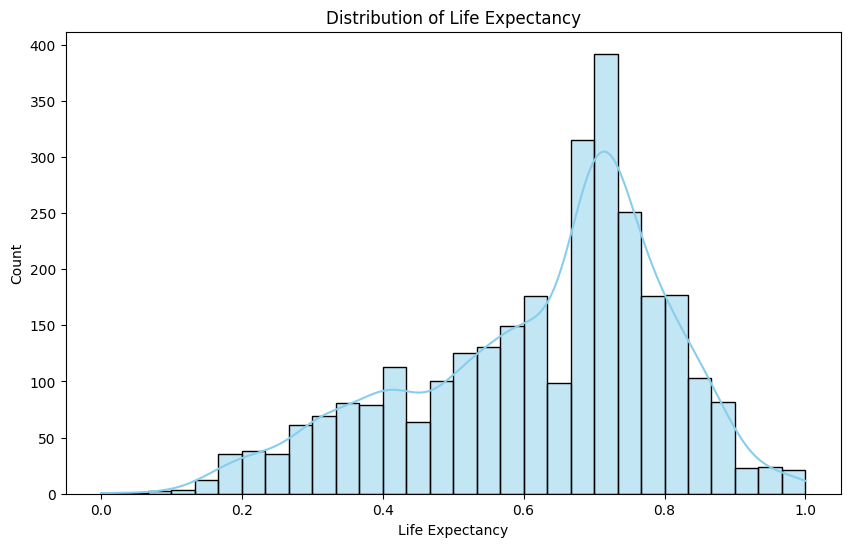

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Count')
plt.show()

Most countries have a life expectancy between 65 (0.65) and 80 (0.80) years.

The distribution is right-skewed, meaning more countries have higher life expectancy.

Very few countries fall below 50 (0.5) years or above 85 (0.85) years.

The peak around 72–75 years shows it's the most common range.





## 4.2 Correlation Heatmap

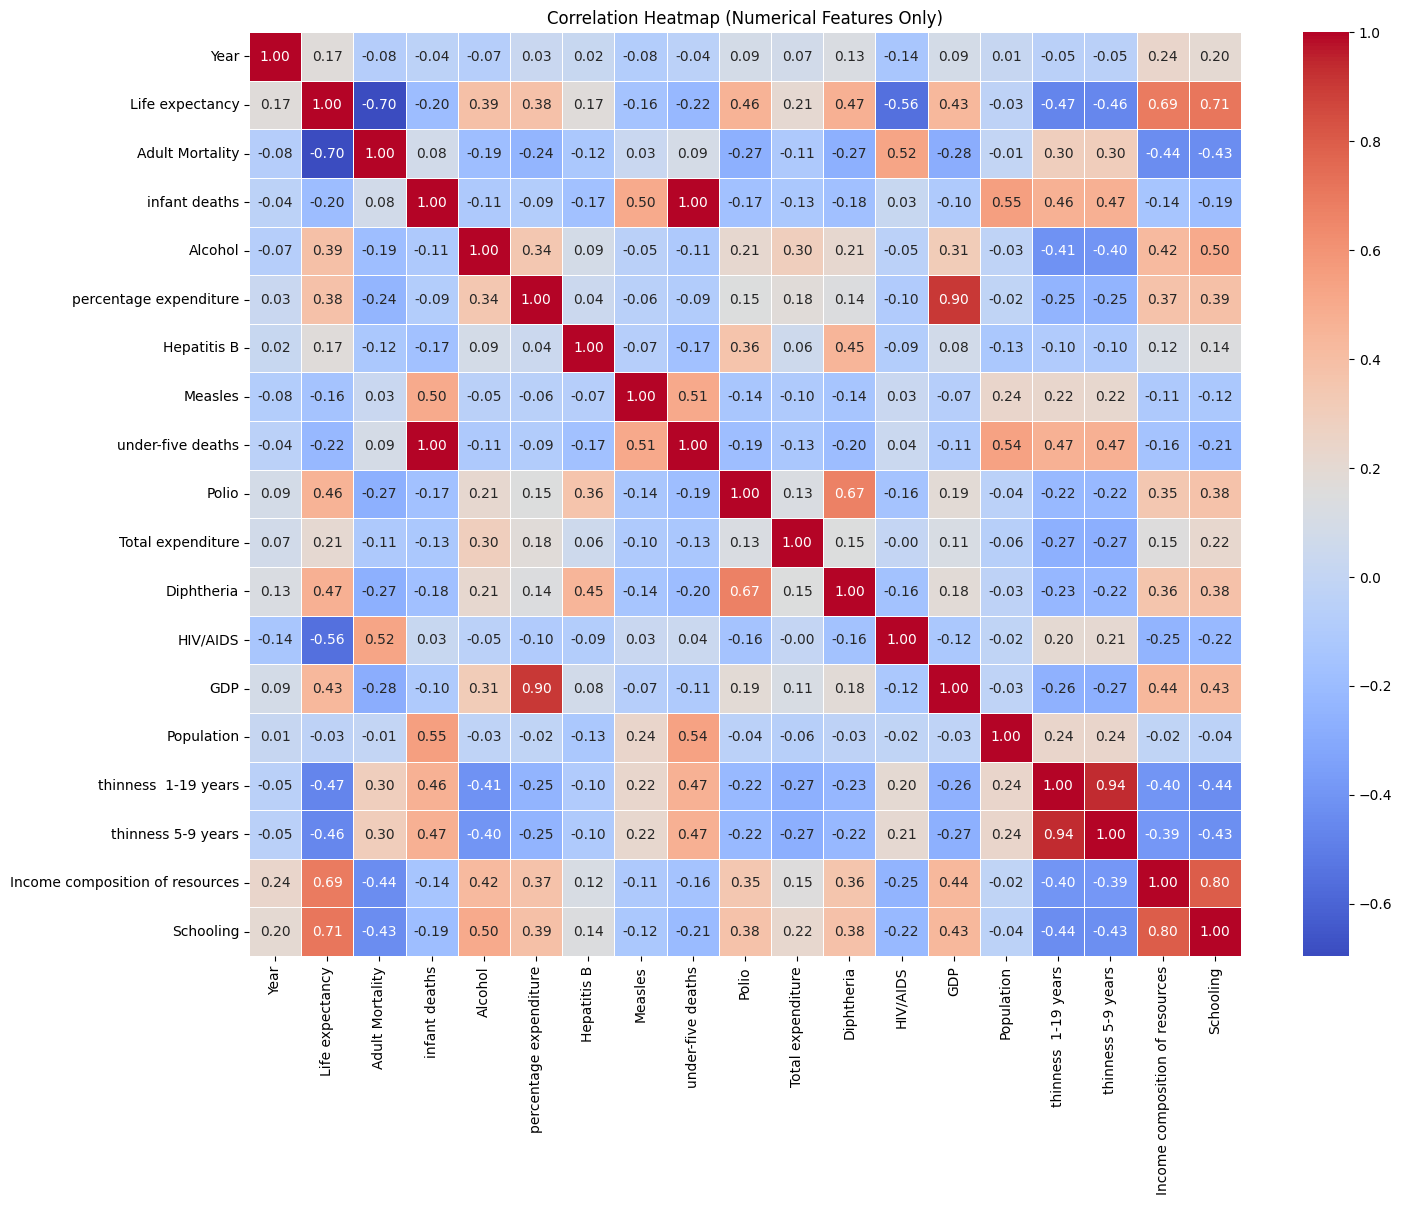

In [ ]:
plt.figure(figsize=(16, 12))
numerical_df = df.select_dtypes(include=['number'])  # exclude strings like 'Country'
correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()

Values range from -1 (strong negative) to +1 (strong positive).

Life expectancy shows:

1. Strong negative correlation with:

  * Adult Mortality (-0.70): Higher mortality → lower life expectancy.

  * HIV/AIDS (-0.56) and infant deaths (-0.40): Higher rates → lower life expectancy.

2. Strong positive correlation with:

  * Schooling (0.75): More years of education → longer life.

  * Income composition of resources (0.72): Better access to resources improves life expectancy.

  * GDP (0.46) and BMI (0.47): Generally, better economy and nutrition lead to higher life expectancy.

## 4.3 Boxplot of Life Expectancy by Status (Developed / Developing)

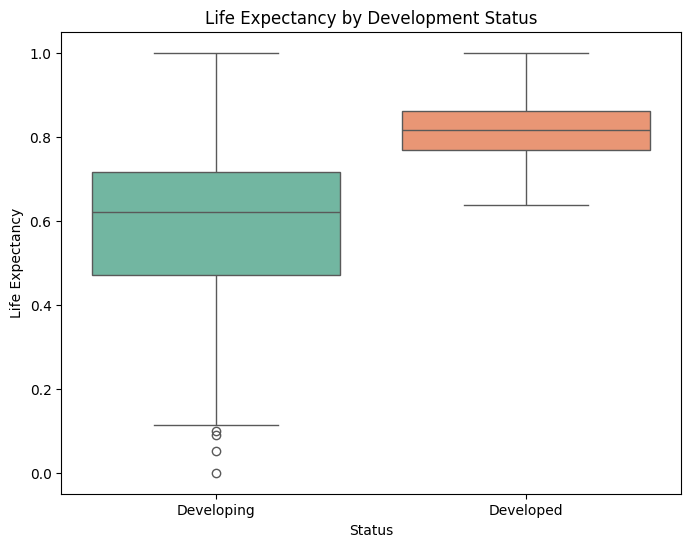

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Life expectancy', data=df, hue='Status', palette='Set2', legend=False)
plt.title('Life Expectancy by Development Status')
plt.xlabel('Status')
plt.ylabel('Life Expectancy')
plt.show()

Developed countries have a significantly higher and less variable life expectancy compared to developing countries. Developing countries show a wider spread with some very low outliers.

## 4.4 Life Expectancy Trend Over Years (mean per year)

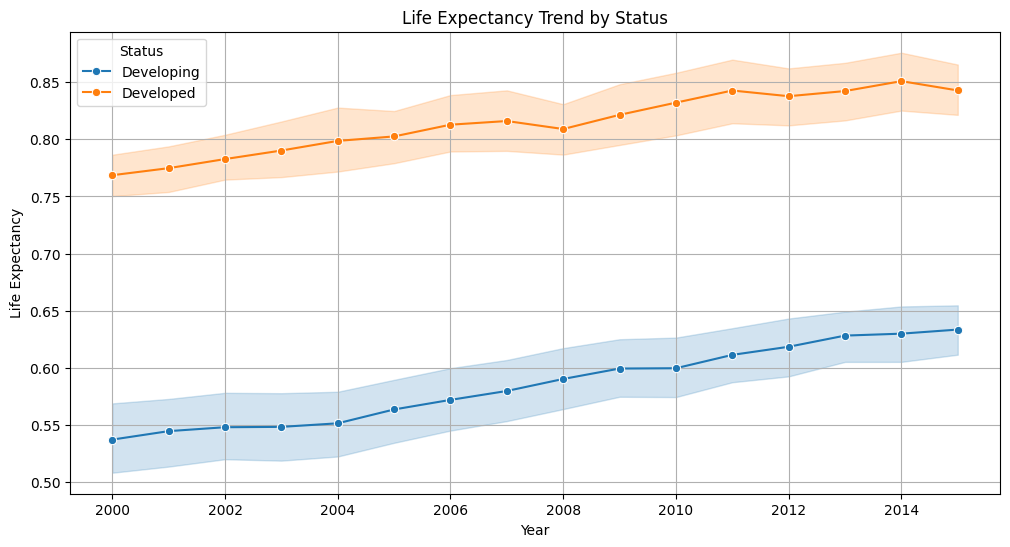

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Life expectancy', hue='Status', marker='o')
plt.title('Life Expectancy Trend by Status')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Status')
plt.grid(True)
plt.show()

Life expectancy has generally increased from 2000 to 2015 for both developed and developing countries. Developed countries consistently show higher life expectancy throughout the period.

## 4.5 Top 20 Countries by Average Life Expectancy



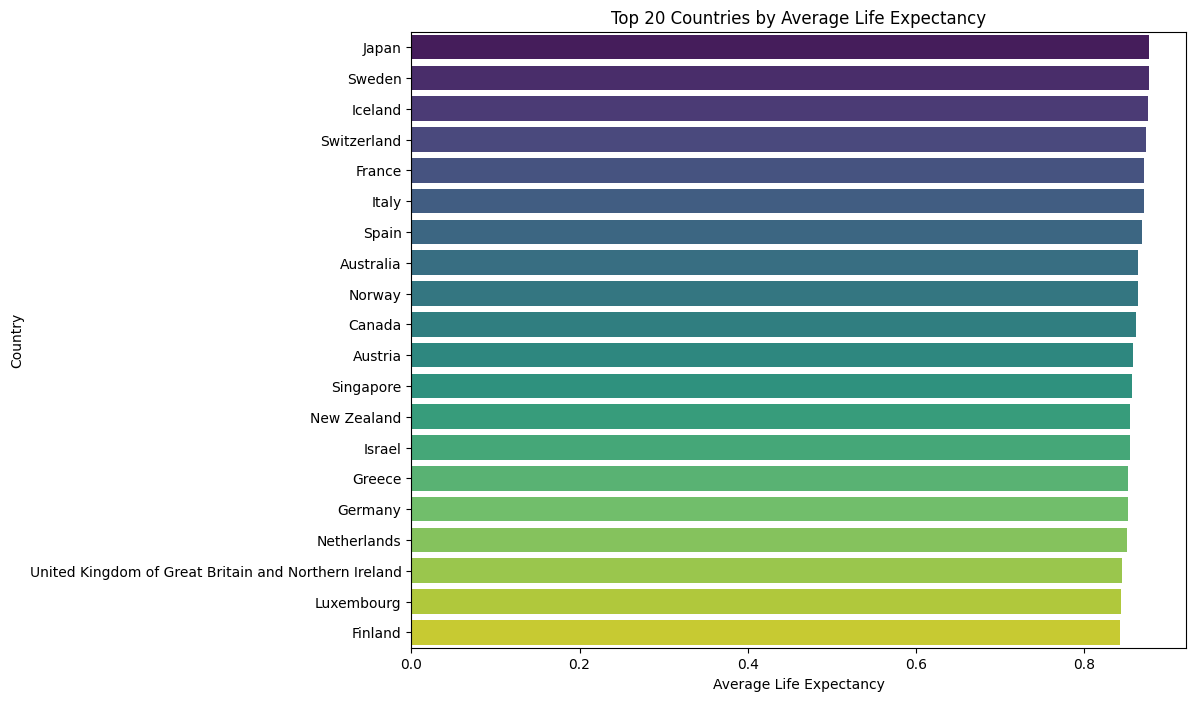

In [ ]:
plt.figure(figsize=(10, 8))
top20_life = df.groupby('Country')['Life expectancy'].mean().sort_values(ascending=False).head(20)

sns.barplot(x=top20_life.values, y=top20_life.index, hue=top20_life.index, palette='viridis', legend=False)
plt.title('Top 20 Countries by Average Life Expectancy')
plt.xlabel('Average Life Expectancy')
plt.ylabel('Country')
plt.show()

Japan, Sweden, and Iceland top the list with the highest life expectancies. All countries in this chart are developed, indicating a strong link between development and longevity.



## 4.6 Bottom 20 Countries by Average Life Expectancy

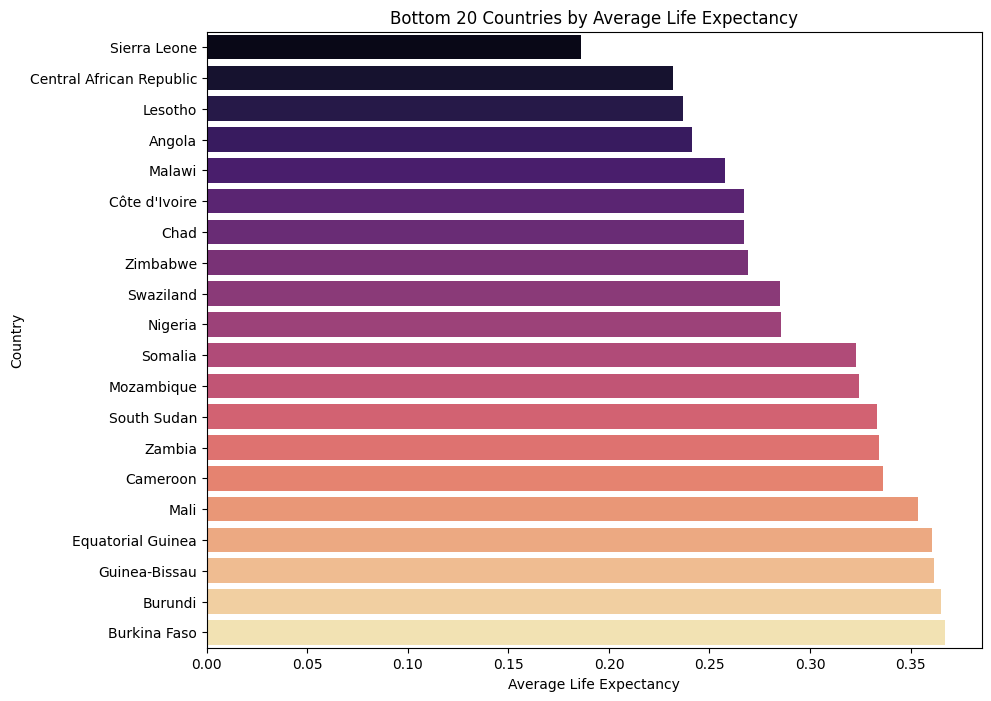

In [ ]:
plt.figure(figsize=(10, 8))
bottom20_life = df.groupby('Country')['Life expectancy'].mean().sort_values(ascending=True).head(20)

sns.barplot(x=bottom20_life.values, y=bottom20_life.index, hue=bottom20_life.index, palette='magma', legend=False)
plt.title('Bottom 20 Countries by Average Life Expectancy')
plt.xlabel('Average Life Expectancy')
plt.ylabel('Country')
plt.show()

 Countries like Sierra Leone, Central African Republic, and Lesotho have the lowest life expectancies. These are predominantly developing nations with poor healthcare infrastructure and socio-economic challenges.



## 4.7 GDP vs Life Expectancy

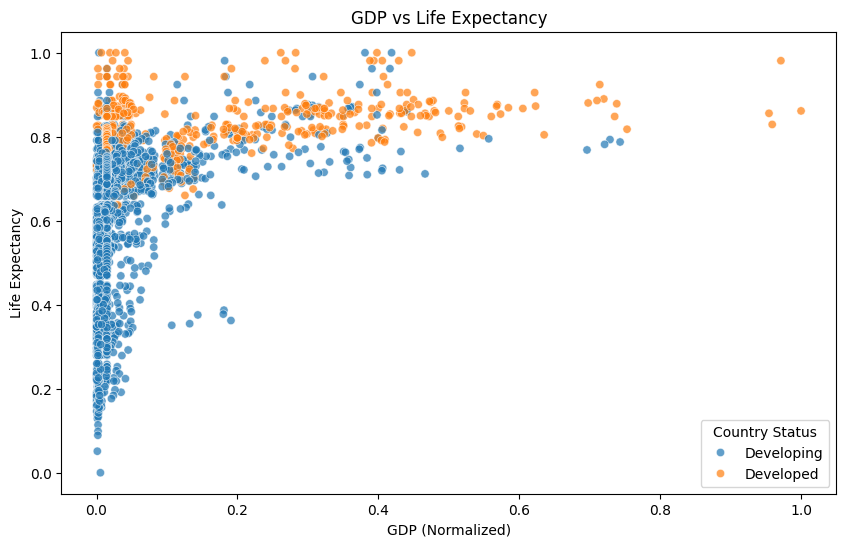

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy', hue='Status', data=df, alpha=0.7)
plt.title('GDP vs Life Expectancy')
plt.xlabel('GDP (Normalized)')
plt.ylabel('Life Expectancy')
plt.legend(title='Country Status')
plt.show()

There is a positive correlation between GDP and life expectancy. Developed countries (orange dots) cluster at higher GDP and life expectancy levels, while developing nations (blue dots) are more spread out with lower values.

## 4.8 Life Expectancy vs. Various Factors

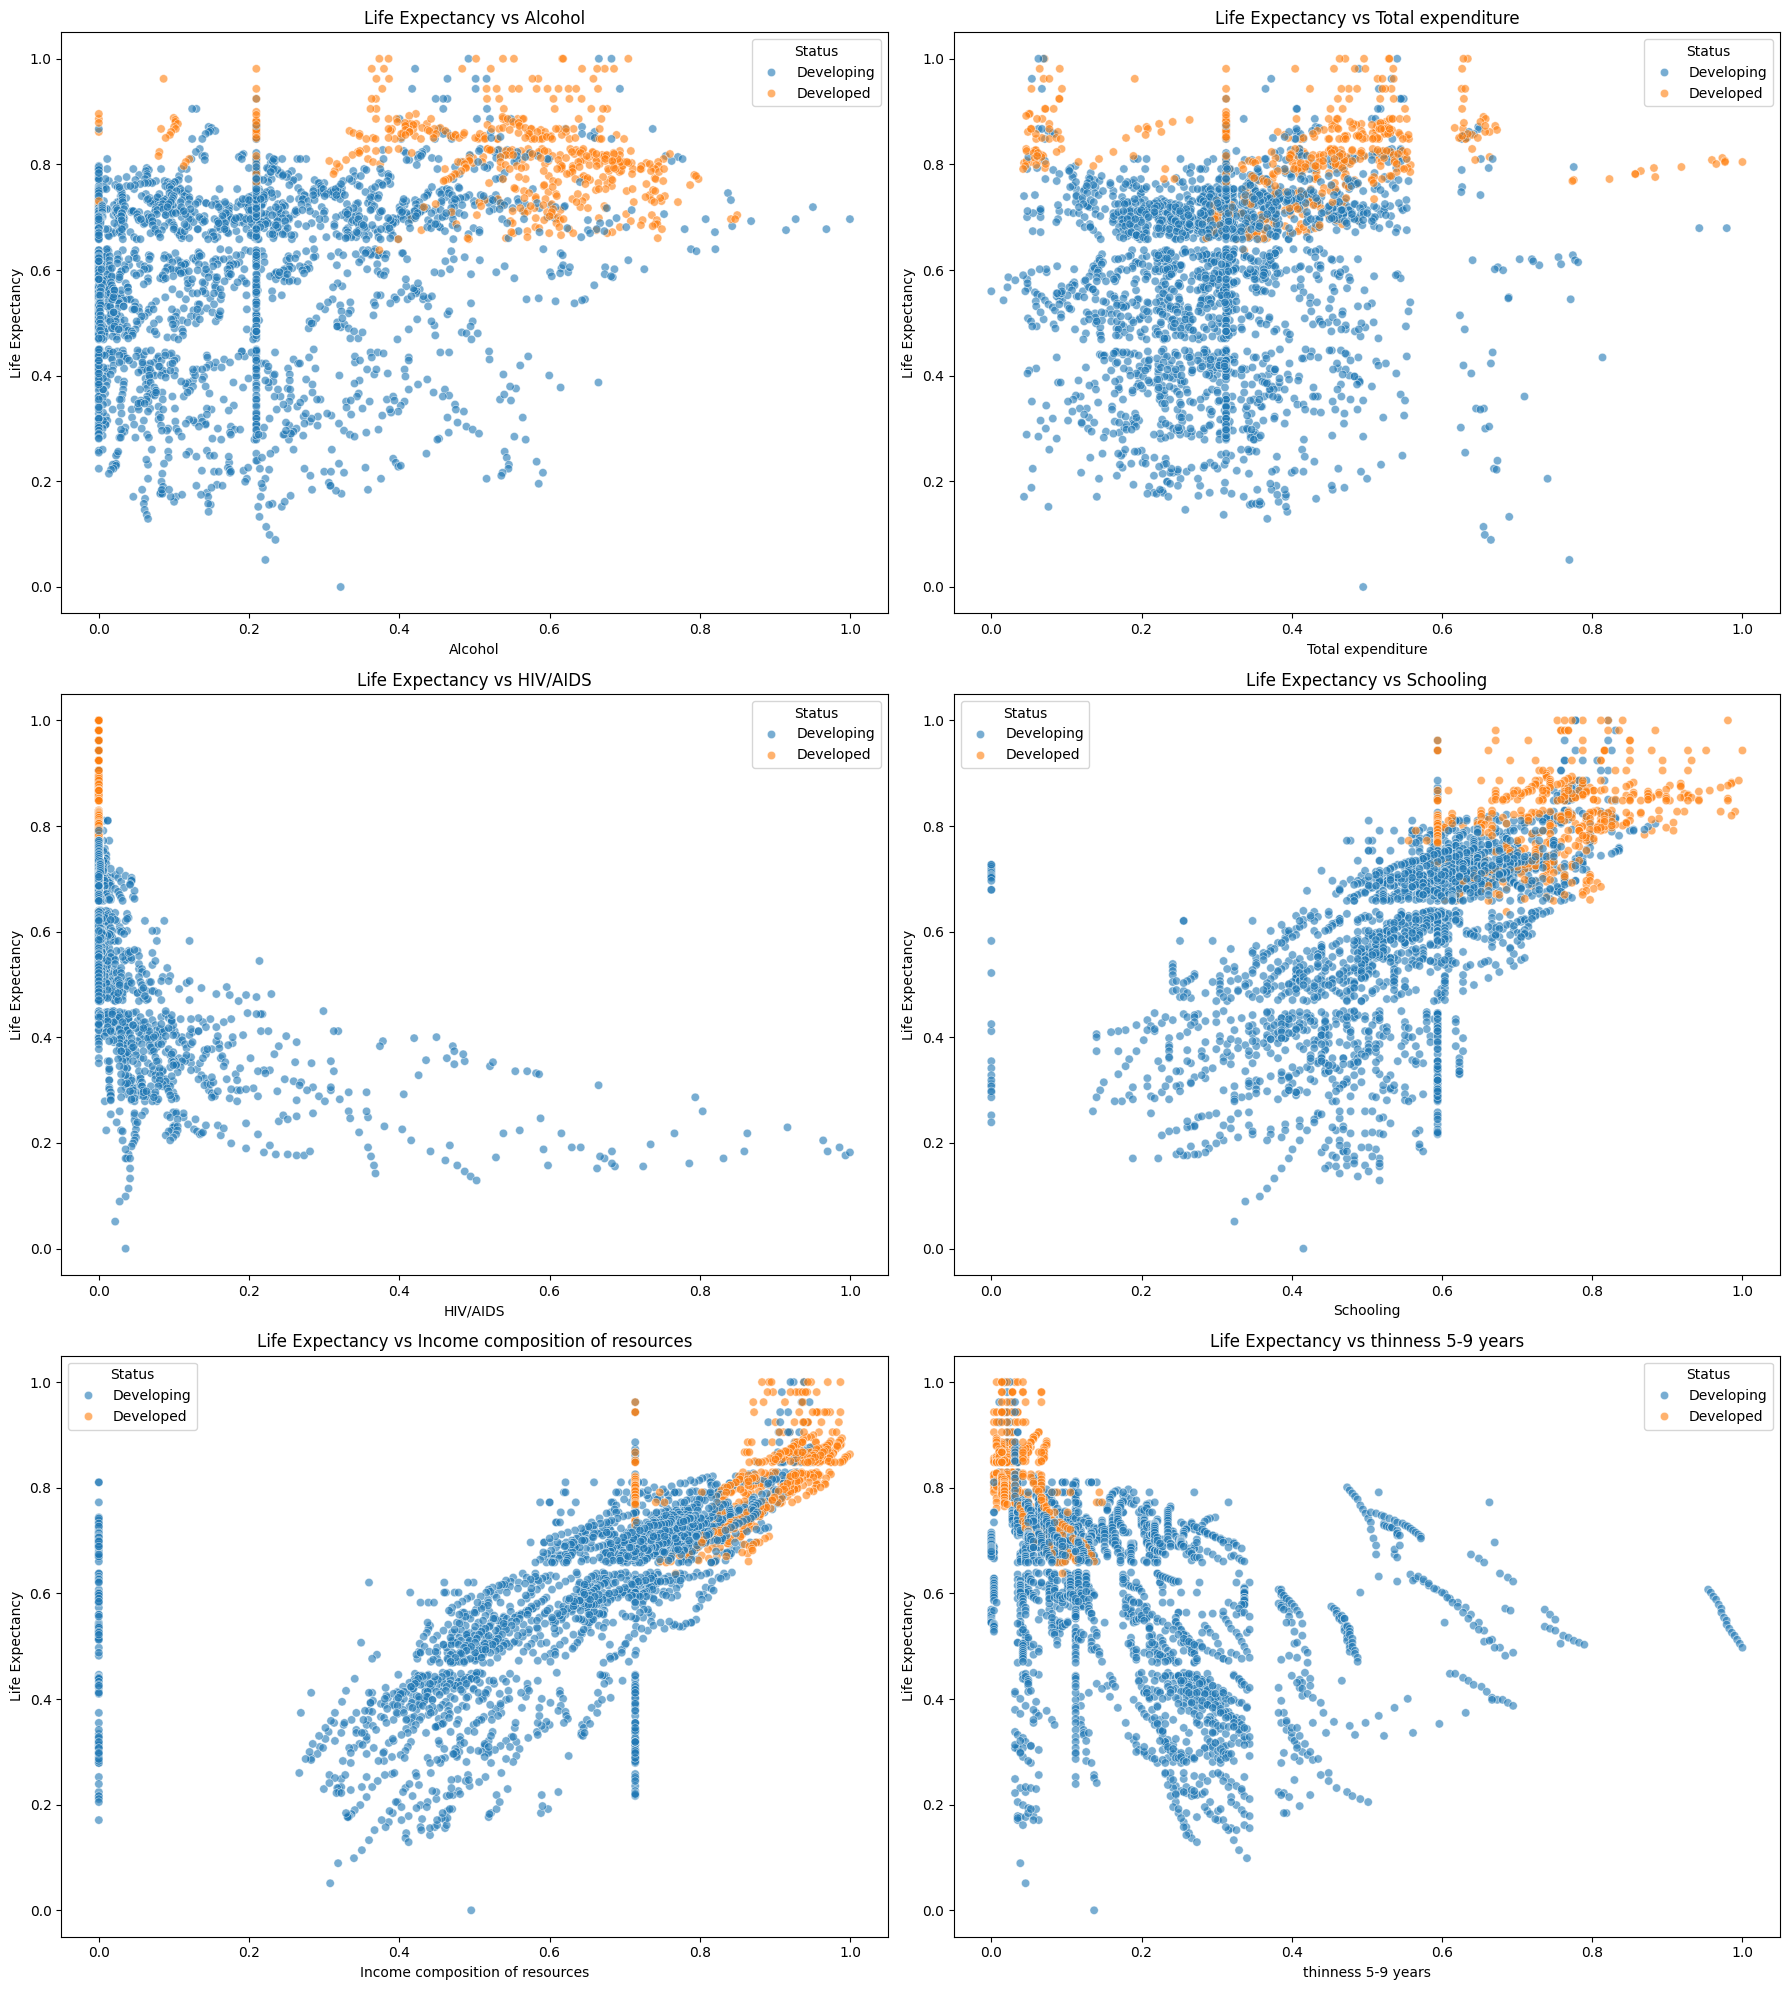

In [ ]:
features = ['Alcohol', 'Total expenditure', 'HIV/AIDS', 'Schooling', 'Income composition of resources', 'thinness 5-9 years']

plt.figure(figsize=(18, 20))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(data=df, x=feature, y='Life expectancy', hue='Status', alpha=0.6)
    plt.title(f'Life Expectancy vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()

Key Relationships:

* HIV/AIDS: Strong negative correlation with life expectancy.

* Schooling & Income Composition: Strong positive correlation.

* Alcohol Consumption: Slight positive trend, more scattered.

* Thinness (5–9 years): Negative trend; higher thinness associates with lower life expectancy.



## 4.9 Pair Plot of Selected Features

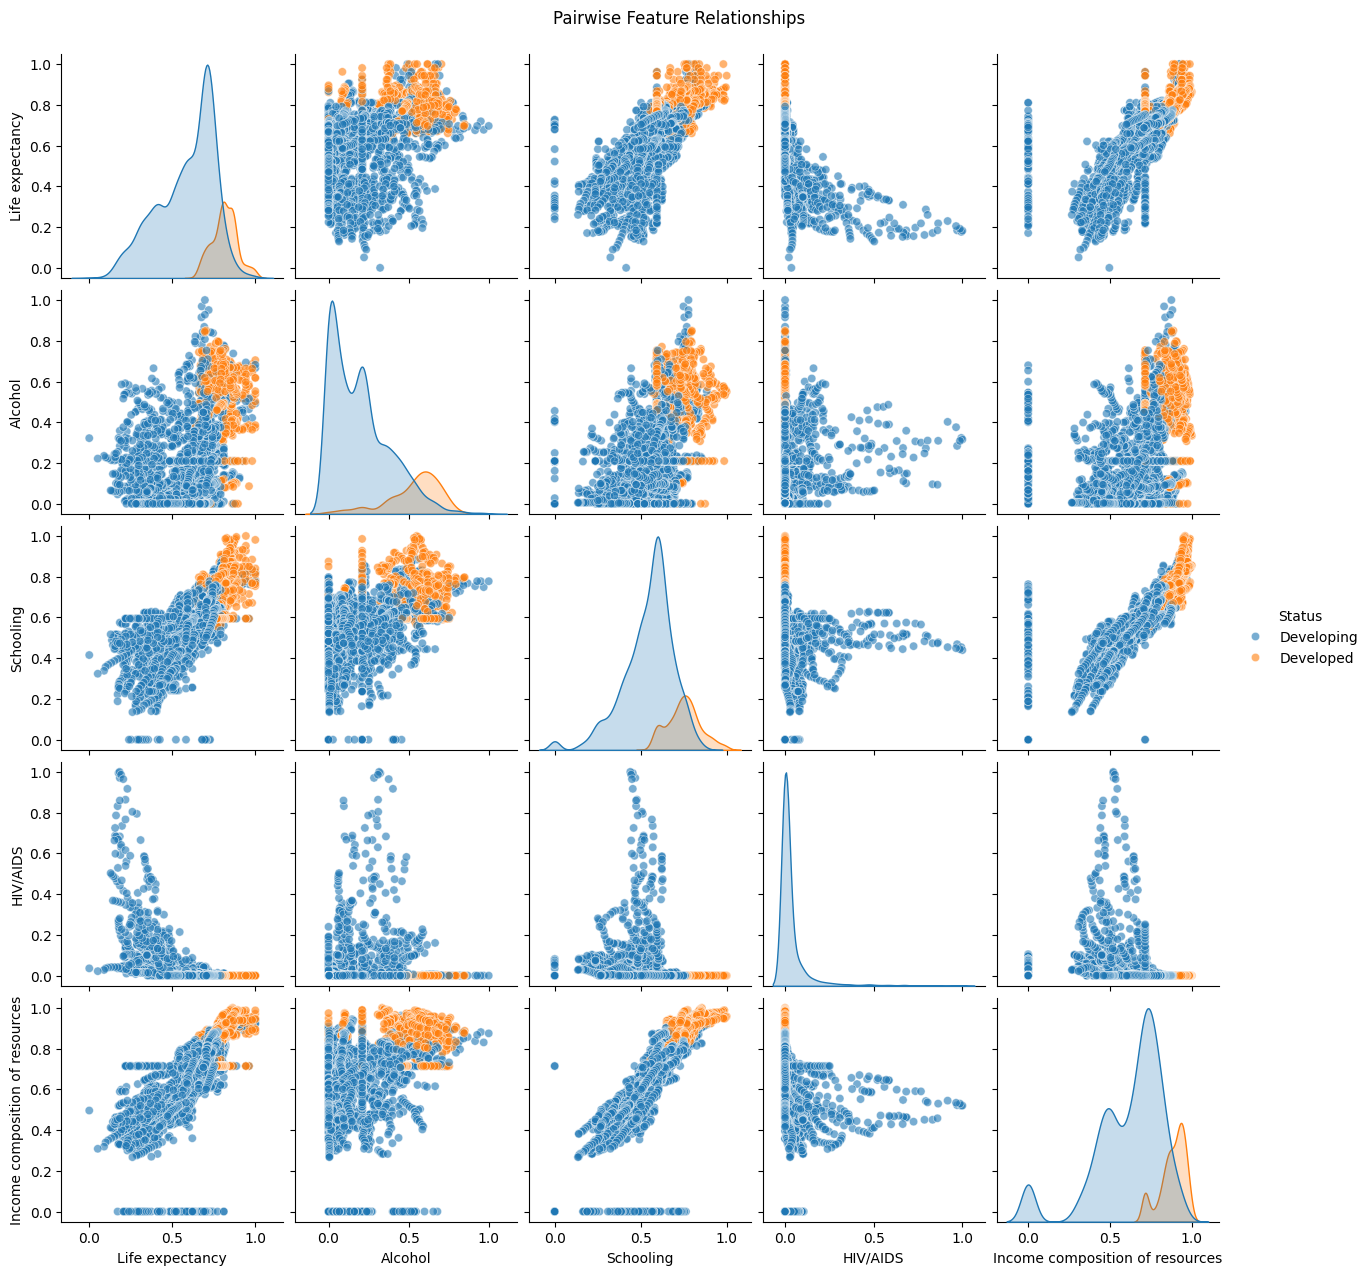

In [ ]:
selected = ['Life expectancy', 'Alcohol', 'Schooling', 'HIV/AIDS', 'Income composition of resources']
sns.pairplot(df[selected + ['Status']], hue='Status', diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

This comprehensive pairwise plot shows:

* Distinct clusters for developed vs. developing nations.

* Strong interrelations between schooling, income composition, and life expectancy.

* Negative correlation between HIV/AIDS and life expectancy is clearly visible.

# 5.0 Statistical Analysis
Statistical analysis is an important step to understand the distribution and characteristics of the data. It includes tests for normality, central tendency, dispersion, skewness, and kurtosis. These measures provide a deeper understanding of how the data is distributed and how individual variables relate to each other. In this section, the Shapiro-Wilk test, Q-Q plot, and descriptive statistics are used to assess the data.

## 5.1 Normality Test: Shapiro-Wilk Test
The Shapiro-Wilk test is used to test the null hypothesis that the data is normally distributed. A p-value lower than 0.05 indicates that the data significantly deviates from a normal distribution, while a higher p-value suggests that the data may be normally distributed. This test was applied to the Life expectancy variable to assess its normality.

In [ ]:
# Shapiro-Wilk test for normality
stat, p_value = shapiro(df['Life expectancy'].dropna())
print(f"Shapiro-Wilk Test: Stat={stat}, p-value={p_value}")

Shapiro-Wilk Test: Stat=0.9557968389229177, p-value=5.641373597049013e-29


**Shapiro-Wilk Test Result:**
- Statistic: 0.9558
- p-value: 5.64e-29 (extremely small)

**Interpretation:**
- The p-value is significantly smaller than 0.05, which indicates that the Life expectancy variable does not follow a normal distribution.
- The Shapiro-Wilk statistic (0.9558) also supports this conclusion, as a statistic close to 1 would indicate normality. Values significantly lower than 1 indicate deviations from normality.

**Conclusion:**
- Life expectancy is not normally distributed.
- Based on the result of the Shapiro-Wilk test, further steps like log transformation or non-parametric methods may be needed in analysis or modeling to accommodate for the non-normality of the data.

## 5.2 Q-Q Plot for Normality Visualization
A Q-Q (Quantile-Quantile) plot is generated to visualize how the data deviates from a normal distribution. Points falling along the diagonal line indicate that the data follows a normal distribution, while deviations from the line indicate non-normality.

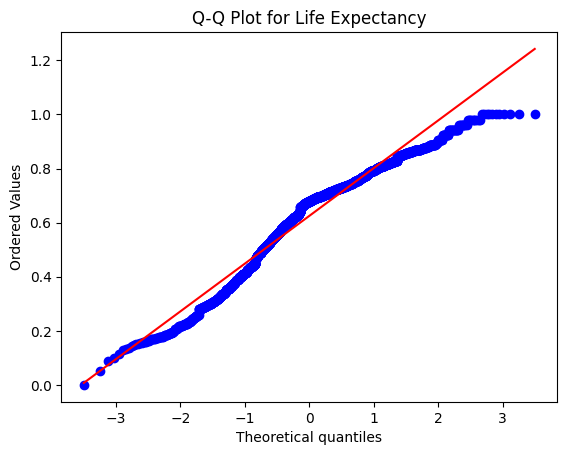

In [ ]:
# Q-Q plot for normality visualization
stats.probplot(df['Life expectancy'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Life Expectancy')
plt.show()

## 5.3 Central Tendency and Dispersion
The central tendency measures (mean, median) and dispersion measures (standard deviation, variance) provide insights into the data's central value and how spread out the values are.

In [ ]:
central_tendency = df[['Life expectancy', 'Adult Mortality', 'Alcohol' , 'Hepatitis B', 'Measles' , 'GDP', 'Schooling']].agg(['mean', 'median'])

dispersion = df[['Life expectancy', 'Adult Mortality', 'Alcohol' , 'Hepatitis B', 'Measles' , 'GDP', 'Schooling']].agg(['std', 'var', 'min', 'max'])

dispersion.loc['range'] = dispersion.loc['max'] - dispersion.loc['min']

central_tendency, dispersion

(        Life expectancy  Adult Mortality   Alcohol  Hepatitis B   Measles  \
 mean           0.624947         0.226767  0.254024     0.836960  0.011403   
 median         0.679317         0.198061  0.209686     0.928571  0.000080   
 
              GDP  Schooling  
 mean    0.055465   0.580185  
 median  0.014813   0.594203  ,
        Life expectancy  Adult Mortality   Alcohol  Hepatitis B   Measles  \
 std           0.180439         0.171865  0.219594     0.234663  0.054044   
 var           0.032558         0.029537  0.048221     0.055067  0.002921   
 min           0.000000         0.000000  0.000000     0.000000  0.000000   
 max           1.000000         1.000000  1.000000     1.000000  1.000000   
 range         1.000000         1.000000  1.000000     1.000000  1.000000   
 
             GDP  Schooling  
 std    0.111576   0.157736  
 var    0.012449   0.024881  
 min    0.000000   0.000000  
 max    1.000000   1.000000  
 range  1.000000   1.000000  )

## 5.4 Skewness
Skewness measures the asymmetry of the data distribution. A skewness value between -0.5 and 0.5 indicates approximately symmetric distribution, while values outside this range indicate skewness.

In [ ]:
# Skewness
df[['Life expectancy', 'Adult Mortality', 'Alcohol' , 'Hepatitis B', 'Measles' , 'GDP', 'Schooling']].skew()

Life expectancy   -0.642391
Adult Mortality    1.177899
Alcohol            0.649578
Hepatitis B       -2.281697
Measles            9.441332
GDP                3.543756
Schooling         -0.635052
dtype: float64

Results:

- Life expectancy: -0.6424 (moderately left-skewed)
- Adult Mortality: 1.1779 (moderately right-skewed)
- Alcohol: 0.6496 (moderately right-skewed)
- Hepatitis B: -2.2817 (highly left-skewed)
- GDP: 3.5438 (highly right-skewed)
- Measles: 9.4413 (highly right-skewed)

Variables like Hepatitis B and Measles are highly skewed, which suggests the presence of extreme values or the need for transformation.

GDP and Adult Mortality also exhibit noticeable skewness, indicating that these features may require transformation or the use of non-parametric methods in subsequent analysis.

## 5.5 Kurtosis
Kurtosis measures the "tailedness" of the distribution. A kurtosis value greater than 3 indicates a distribution with heavy tails (leptokurtic), while values less than 3 indicate lighter tails (platykurtic).

In [ ]:
# Kurtosis
df[['Life expectancy', 'Adult Mortality', 'Alcohol', 'GDP', 'Schooling']].kurtosis()

Life expectancy    -0.224081
Adult Mortality     1.766855
Alcohol            -0.624913
GDP                15.143186
Schooling           1.123676
dtype: float64

Results:

- Life expectancy: -0.2241 (platykurtic, lighter tails)
- Adult Mortality: 1.7669 (leptokurtic, heavy tails)
- Alcohol: -0.6249 (platykurtic, lighter tails)
- GDP: 15.1432 (highly leptokurtic, very heavy tails)
- Schooling: 1.1237 (platykurtic, lighter tails)

GDP exhibits very high kurtosis, indicating the presence of extreme values or outliers.

Life expectancy and Alcohol show lower kurtosis, suggesting that these features have a more uniform distribution with lighter tails.

## 5.6 Histogram Visualization
Histograms provide a visual representation of the distribution of each variable. They help assess the skewness and kurtosis, confirming the numerical results from the skewness and kurtosis tests.

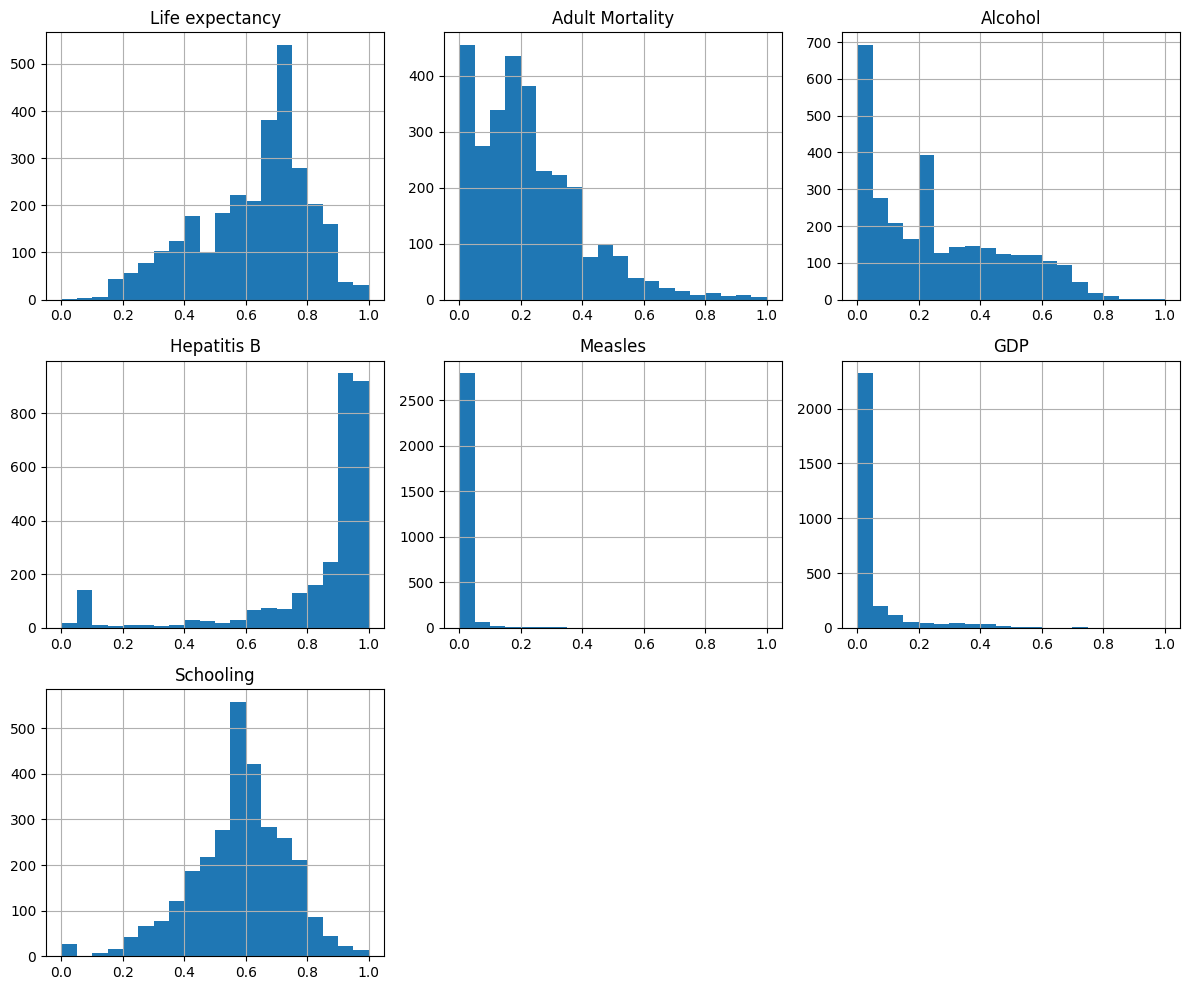

In [ ]:
# Histogram
df[['Life expectancy', 'Adult Mortality', 'Alcohol' , 'Hepatitis B', 'Measles' , 'GDP', 'Schooling']].hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

# 6.0 Correlation Analysis
Correlation analysis is a critical step in understanding the relationships between variables, particularly identifying how strongly each feature correlates with the target variable (in this case, Life expectancy). High correlation can reveal important relationships, but it may also indicate redundancy among features, which could introduce issues like multicollinearity in modeling.

## 6.1 Correlation Coefficients
The correlation matrix is computed to evaluate the relationship between Life expectancy and other variables in the dataset. The correlation coefficient (ranging from -1 to 1) tells us the strength and direction of the relationship:

- Positive correlation (r > 0): As one feature increases, the other increases.
- Negative correlation (r < 0): As one feature increases, the other decreases.
- Weak or no correlation (r ≈ 0): No significant relationship between the features.

In [ ]:
target_corr = correlation_matrix['Life expectancy'].drop(['Life expectancy'])

# Sort by absolute correlation
ranked_features = target_corr.reindex(target_corr.abs().sort_values(ascending=False).index)

print(ranked_features)

Schooling                          0.713054
Adult Mortality                   -0.696390
Income composition of resources    0.688662
HIV/AIDS                          -0.556703
Diphtheria                         0.472211
thinness  1-19 years              -0.468002
thinness 5-9 years                -0.462473
Polio                              0.458399
GDP                                0.430461
Alcohol                            0.388918
percentage expenditure             0.381418
under-five deaths                 -0.222738
Total expenditure                  0.208844
infant deaths                     -0.196769
Year                               0.170819
Hepatitis B                        0.170219
Measles                           -0.157767
Population                        -0.029014
Name: Life expectancy, dtype: float64


## 6.2 High Correlation Between Features


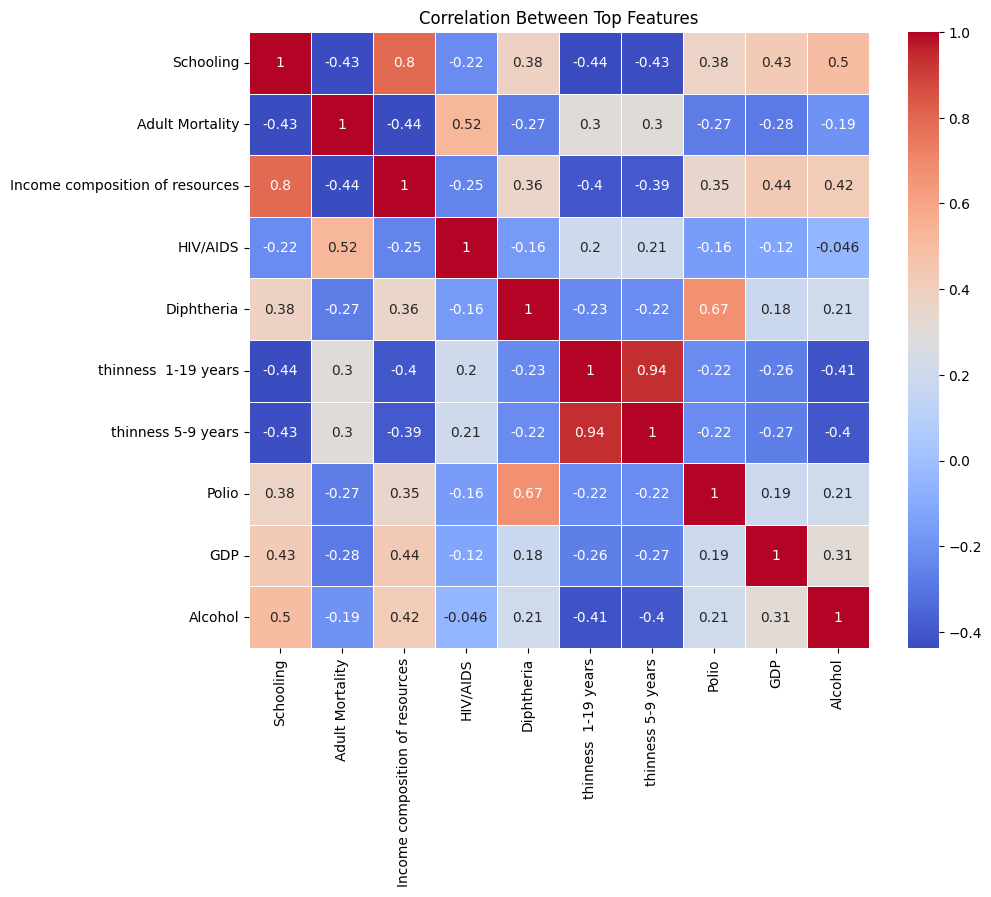

In [ ]:
# Get the top 10 features
top_features = ranked_features.head(10).index

# Filter correlation matrix to just top features
top_corr_matrix = numerical_df[top_features].corr()

# Plot smaller heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Top Features')
plt.show()

Very high correlation between features (above 0.8) which means they carry duplicated information.

Feature A & Feature B: Correlation Value
1.   Income composition & Schooling: 0.8
2.   Thinness 1–19 years & Thinness 5–9 years: 0.94

Keeping both in each pair may confuse ML later due to multicollinearity.

Choosing just one from each high-correlation pair based on stronger correlation with Life Expectancy

## 6.3 Selection of Final Features
Based on the correlation analysis, the following features were selected for inclusion in the final analysis, as they have strong correlations with Life expectancy while minimizing multicollinearity:

In [ ]:
#Final Shortlisted Features (Non-redundant, highly correlated with Life Expectancy):
selected_features = [
    'Schooling',
    'Adult Mortality',
    'HIV/AIDS',
    'Diphtheria',
    'thinness  1-19 years',
    'Polio',
    'GDP',
    'Alcohol',
    'Life expectancy'  # Include target variable
]

## 6.4 Visualizing Relationships
To better understand the relationships between the selected features and Life expectancy, scatter plots are generated for each feature against Life expectancy. These plots show the strength of the relationships and can help identify potential linear or non-linear trends.

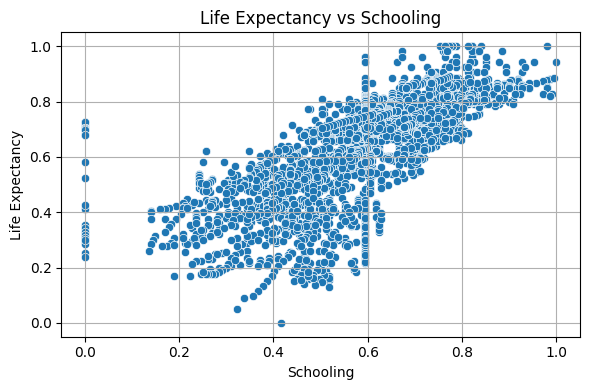

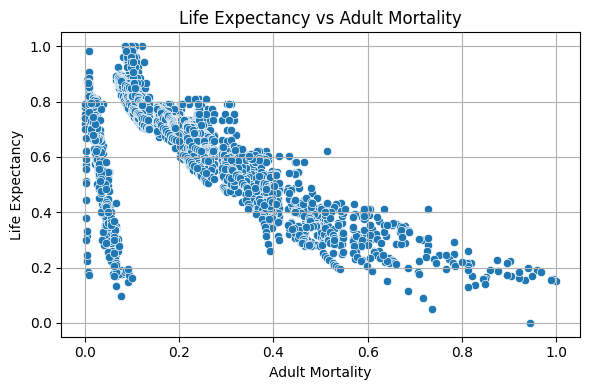

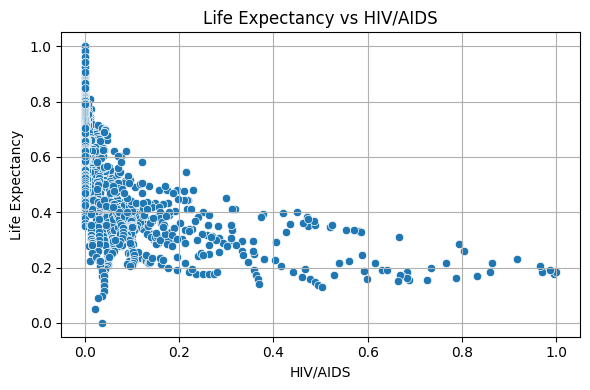

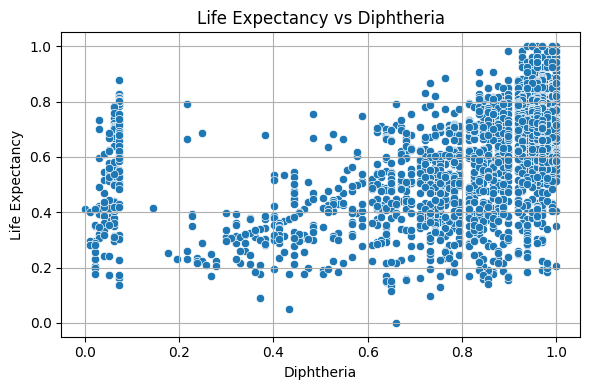

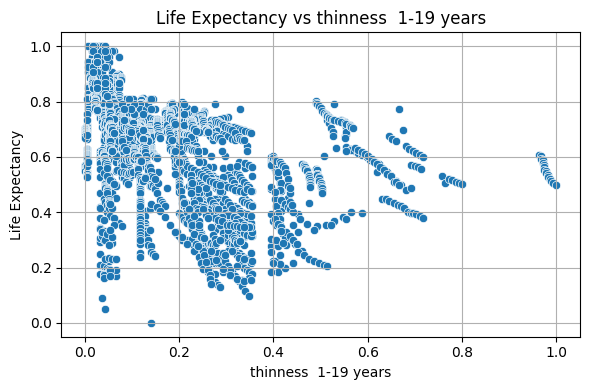

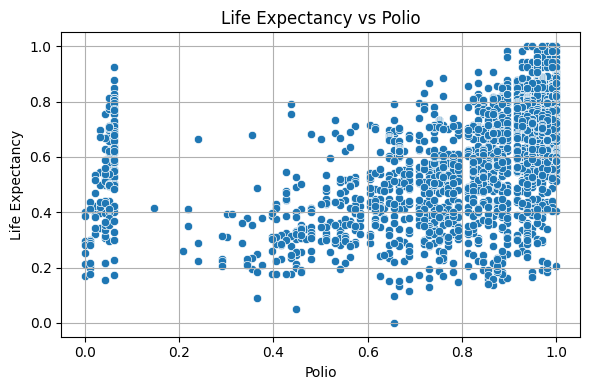

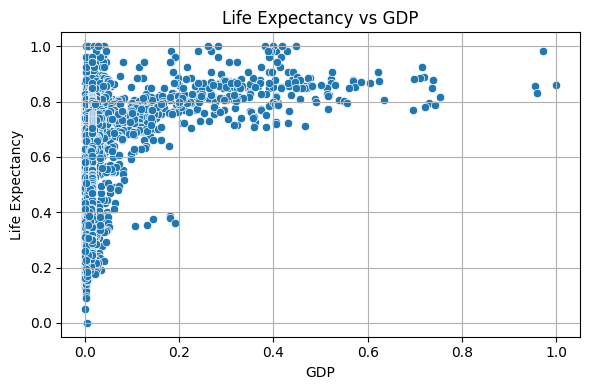

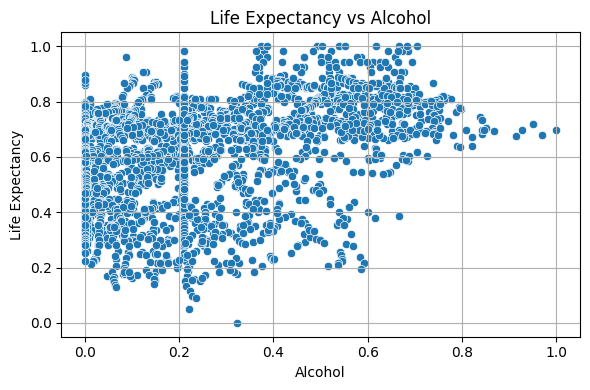

In [ ]:
for feature in selected_features[:-1]:  # exclude 'Life expectancy' from X
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='Life expectancy')
    plt.title(f'Life Expectancy vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Life Expectancy')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 6.5 Variance Inflation Factor (VIF) Analysis
To further ensure that there is no high multicollinearity among the selected features, Variance Inflation Factor (VIF) analysis is conducted. VIF quantifies how much the variance of a regression coefficient is inflated due to collinearity with other features. A VIF value above 5 suggests significant multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Your selected features (exclude target column)
features_for_vif = [
    'Schooling',
    'Adult Mortality',
    'HIV/AIDS',
    'Diphtheria',
    'thinness  1-19 years',
    'Polio',
    'GDP',
    'Alcohol',
]

# Create a DataFrame with just these columns
X = df[features_for_vif].dropna()  # Drop NaNs just in case
X = add_constant(X)  # Add constant for intercept (needed by statsmodels)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display results
print(vif_data)

                Feature        VIF
0                 const  41.817789
1             Schooling   1.900544
2       Adult Mortality   1.665677
3              HIV/AIDS   1.397699
4            Diphtheria   1.906658
5  thinness  1-19 years   1.363873
6                 Polio   1.900093
7                   GDP   1.271468
8               Alcohol   1.456892


Performed Variance Inflation Factor (VIF) analysis on the shortlisted variables. All features showed VIF values well below the commonly used threshold of 5, indicating low multicollinearity.

This means that each feature contributes unique information and is not redundant with others, making them suitable for use in further modeling of life expectancy. No features were removed at this stage.

# 7.0 Dimensionality Reduction
Dimensionality reduction is an important technique to simplify the dataset by reducing the number of features while retaining as much information as possible. It helps to prevent overfitting, improve model performance, and visualize the data better. In this case, Principal Component Analysis (PCA) is used to reduce the dimensionality of the feature set and explore how the number of components affects the variance explained by the model.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Target variable
y = df['Life expectancy']

# Features
X = df.drop(['Country', 'Year', 'Status','Life expectancy'], axis=1)

In [ ]:
X

Adult Mortality  infant deaths   Alcohol  percentage expenditure  \
0            0.362881       0.034444  0.000000                0.003659   
1            0.373961       0.035556  0.000000                0.003774   
2            0.369806       0.036667  0.000000                0.003759   
3            0.375346       0.038333  0.000000                0.004014   
4            0.379501       0.039444  0.000000                0.000364   
...               ...            ...       ...                     ...   
2933         1.000000       0.015000  0.243561                0.000000   
2934         0.988920       0.014444  0.226764                0.000000   
2935         0.099723       0.013889  0.247480                0.000000   
2936         0.948753       0.013889  0.095745                0.000000   
2937         0.919668       0.013333  0.093505                0.000000   

      Hepatitis B   Measles  under-five deaths     Polio  Total expenditure  \
0        0.653061  0.005439             0.0332  0.031250           0.452118   
1        0.622449  0.002319             0.0344  0.572917           0.453279   
2        0.642857  0.002027             0.0356  0.614583           0.450377   
3        0.673469  0.013135             0.0372  0.666667           0.473012   
4        0.683673  0.014200             0.0388  0.677083           0.435287   
...           ...       ...                ...       ...                ...   
2933     0.683673  0.000146             0.0168  0.666667           0.392339   
2934     0.061224  0.004703             0.0164  0.041667           0.356936   
2935     0.734694  0.001433             0.0160  0.729167           0.357516   
2936     0.765306  0.002493             0.0156  0.760417           0.336042   
2937     0.795918  0.006989             0.0156  0.781250           0.390598   

      Diphtheria  HIV/AIDS       GDP  Population  thinness  1-19 years  \
0       0.649485  0.000000  0.004889    0.026074              0.619565   
1       0.618557  0.000000  0.005127    0.000253              0.630435   
2       0.639175  0.000000  0.005287    0.024525              0.637681   
3       0.670103  0.000000  0.005608    0.002857              0.644928   
4       0.680412  0.000000  0.000519    0.002302              0.655797   
...          ...       ...       ...         ...                   ...   
2933    0.649485  0.663366  0.003799    0.009875              0.336957   
2934    0.680412  0.724752  0.003790    0.009764              0.351449   
2935    0.711340  0.786139  0.000467    0.000097              0.039855   
2936    0.752577  0.831683  0.004589    0.009558              0.054348   
2937    0.783505  0.859406  0.004579    0.009446              0.394928   

      thinness 5-9 years  Income composition of resources  Schooling  
0               0.603509                         0.505274   0.487923  
1               0.610526                         0.502110   0.483092  
2               0.617544                         0.495781   0.478261  
3               0.628070                         0.488397   0.473430  
4               0.635088                         0.478903   0.458937  
...                  ...                              ...        ...  
2933            0.326316                         0.429325   0.444444  
2934            0.343860                         0.440928   0.458937  
2935            0.042105                         0.450422   0.483092  
2936            0.056140                         0.450422   0.473430  
2937            0.389474                         0.457806   0.473430  

[2938 rows x 17 columns]

## 7.1 Splitting the Dataset and Standardization
Before applying PCA, the dataset is split into training and test sets using the train_test_split function from sklearn.model_selection. This ensures that the model will be trained on one subset of the data and tested on another, which helps evaluate its generalization ability. Additionally, StandardScaler is used to standardize the features, ensuring that each feature has a mean of 0 and a standard deviation of 1, which is important for PCA because it is sensitive to the scale of the data.

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
transformed_X_train = scaler.fit_transform(X_train)
transformed_X_test = scaler.transform(X_test)

train_test_split: Splits the data into 70% training and 30% testing.

StandardScaler: Standardizes the data so each feature has zero mean and unit variance.

## 7.2 PCA and Explained Variance Ratio
Principal Component Analysis (PCA) is applied to the standardized data. PCA is a technique that transforms the data into a set of orthogonal components, where each component explains a certain amount of variance in the data. The explained variance ratio is plotted to show how much variance is captured by each principal component.

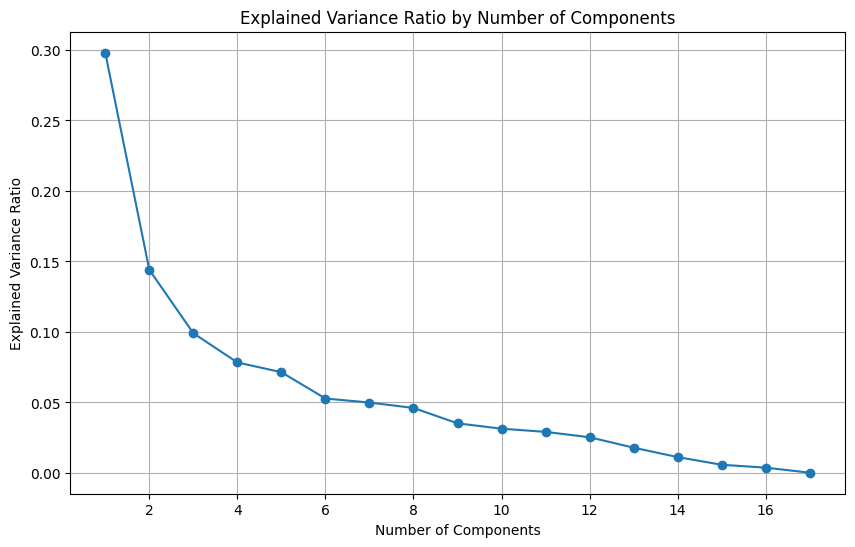

In [ ]:
# PCA Implementation for explained variance ratio plot
pca = PCA()
X_train_pca = pca.fit_transform(transformed_X_train)

# Explained Variance Ratio Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

- A larger number of components may explain more variance, but using too many components could lead to overfitting.
- The elbow method (where the variance explained by each component starts to plateau) is typically used to choose the optimal number of components.

## 7.3 Cumulative Explained Variance
The cumulative explained variance plot helps visualize the total variance explained as more components are added. The goal is to select the smallest number of components that capture at least 90% of the variance, balancing simplicity and information retention.

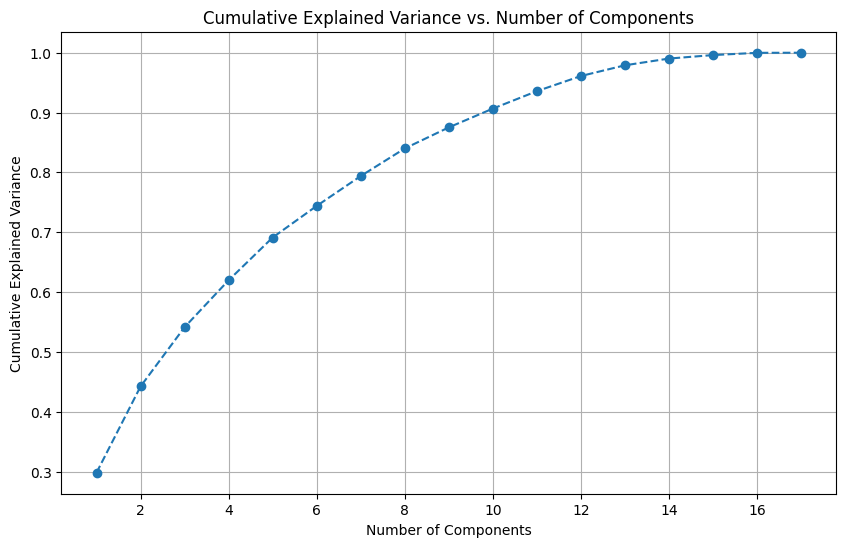

In [ ]:
# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

The number of components is chosen where the cumulative variance reaches 90% or higher, which is considered a good balance between model complexity and performance.

## 7.4 Choosing the Number of Components
Based on the cumulative explained variance, the number of principal components is determined to capture at least 90% of the variance. The elbow method and cumulative variance guide this decision.

In [ ]:
# Determine the number of components using the elbow method or cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.90) + 1 # finds the point where the cumulative variance reaches or exceeds 90%.
print(f"Number of components chosen: {n_components}")

Number of components chosen: 10


## 7.5 PCA Transformation
- With the selected number of components, PCA is applied again to the training and test datasets. The transformed data (X_train_pca and X_test_pca) will now contain the principal components instead of the original features.
- The dataset is projected into a lower-dimensional space, retaining the most important features (principal components) for further analysis or modeling.

In [ ]:
# PCA Implementation
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(transformed_X_train)
X_test_pca = pca.transform(transformed_X_test)

## 7.6 Visualization of PCA
A scatter plot is generated to visualize the transformed dataset in the new PCA space. This helps to better understand how the training and test data points are distributed across the principal components.

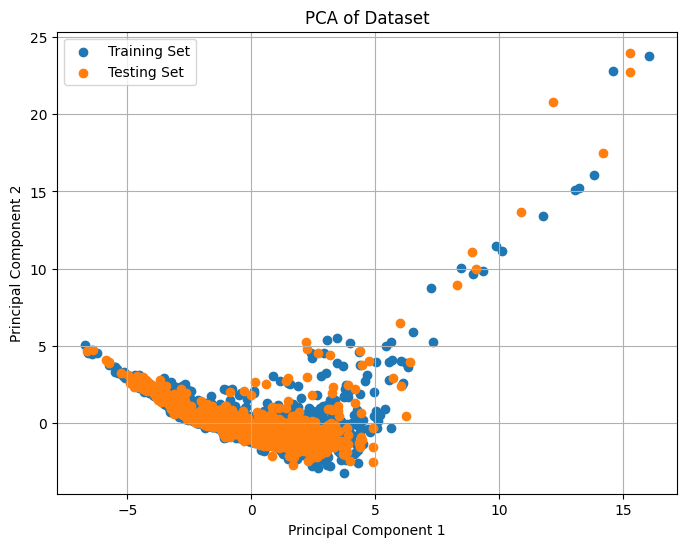

In [ ]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], label='Training Set')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], label='Testing Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.legend()
plt.grid(True)
plt.show()

## 7.7 PCA Transformed DataFrames

In [ ]:
X_train_df = pd.DataFrame(X_train_pca)
X_test_df = pd.DataFrame(X_test_pca)
X_train_df.info()
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2056 non-null   float64
 1   1       2056 non-null   float64
 2   2       2056 non-null   float64
 3   3       2056 non-null   float64
 4   4       2056 non-null   float64
 5   5       2056 non-null   float64
 6   6       2056 non-null   float64
 7   7       2056 non-null   float64
 8   8       2056 non-null   float64
 9   9       2056 non-null   float64
dtypes: float64(10)
memory usage: 160.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       882 non-null    float64
 1   1       882 non-null    float64
 2   2       882 non-null    float64
 3   3       882 non-null    float64
 4   4       882 non-null    float64
 5   5       882 non-null    float64
 6   

The PCA transformation has successfully reduced the dataset to 10 principal components for both the training and testing datasets, which captures the most important variance from the original features. Each component represents a linear combination of the original features, with the aim of reducing dimensionality while retaining key information.

- Training Set: 2056 rows and 10 principal components
- Testing Set: 882 rows and 10 principal components
- No missing values: Both the training and testing sets have valid (non-null) data for all the principal components.

# 8.0 Model Comparison and Performance Evaluation

This section involves evaluating multiple machine learning models to predict Life expectancy using a set of features. The models selected for this evaluation include **Random Forest, Support Vector Machine (SVM), Linear Regression, Gradient Boosting**, and **Neural Network**. The goal is to compare the performance of each model based on several metrics, such as **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, and **R-squared**, and identify the best-performing model.

1. **Random Forest** is an ensemble method based on decision trees. It builds multiple decision trees during training and outputs the average prediction from all the individual trees. It helps reduce overfitting and variance compared to a single decision tree.

2. **Support Vector Machines** are powerful for regression and classification tasks. SVM aims to find the optimal hyperplane that maximizes the margin between different classes (or predicted values in regression). In this case, the SVR (Support Vector Regression) is used.

3. **Linear Regression** is one of the simplest regression models, which assumes a linear relationship between the input features and the target variable. It fits the data using the least squares method to minimize the sum of squared errors between the predicted and actual values.

4. **Gradient Boosting** is another ensemble method where weak learners (usually decision trees) are trained sequentially. Each tree corrects the errors made by the previous tree, and the final model is the sum of all the individual models. Gradient Boosting minimizes the residual sum of squares using gradient descent.

5. **Multilayer Perceptron (MLP)** is a type of neural network model that can learn non-linear relationships between features. It consists of multiple layers of neurons, and each layer's output is passed through an activation function. MLP is trained using backpropagation, which updates the weights to minimize the error.

In [ ]:
models = [
    ('Random Forest', RandomForestRegressor()),
    ('SVM', SVR()),
    ('Linear Regression', LinearRegression()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Neural Network', MLPRegressor(max_iter=1000))
]

## 8.1 Hyperparameter Tuning and Cross-Validation

To enhance model performance, RandomizedSearchCV is used for hyperparameter tuning, which randomly searches the hyperparameter space. For each model, a set of potential hyperparameters is defined, and cross-validation is used to evaluate the model's performance with different hyperparameter combinations. The best model and its hyperparameters are stored for further evaluation.

- RandomizedSearchCV: Searches for the best hyperparameters for each model.
- cv=5: 5-fold cross-validation is used to evaluate the model's performance during the hyperparameter search.
- n_iter=10: 10 iterations of random search to explore different hyperparameter combinations.

## 8.2 Model Evaluation Metrics
For each model, multiple evaluation metrics are computed to assess its performance:

1. Mean Cross-Validated Accuracy: The mean accuracy across the 5-fold cross-validation.

2. Test Accuracy (R-squared): The R-squared value on the test set, which indicates how well the model fits the data.

3. Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values.

4. Root Mean Squared Error (RMSE): The square root of the MSE, which provides a more interpretable error metric.


In [ ]:
# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Dictionary to store best models and their parameters
best_models = {}

# Dictionary to store mean cross-validation accuracies and test accuracies
mean_cv_accuracies = {}
test_accuracies = {}

# Dictionary to store Mean Squared Error(MSE), Root Mean Squared Error(RMSE), R-squared
mse_scores = {}
rmse_scores = {}
r2_scores = {}

# Hyperparameter tuning grids for each model
param_grids = {
    'Random Forest': {
        'n_estimators': randint(100, 300),
        'max_depth': [None, 10, 20],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 5)
    },
    'SVM': {
        'C': uniform(0.1, 10),
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Linear Regression': {},  # No hyperparameter tuning for Linear Regression
    'Gradient Boosting': {
        'n_estimators': randint(50, 200),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 7)
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    }
}

# Inverse transform y_test
y_test_orig = scaler_y.inverse_transform(y_test.values.reshape(-1, 1)).ravel()

# Iterate over each model
for model_name, model in models:

    param_grid = param_grids[model_name]

    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(model, param_grid, cv=5, n_jobs=-1, n_iter=10)
    random_search.fit(X_train_pca, y_train)

    # Store the best model
    best_models[model_name] = random_search.best_estimator_

    # Calculate cross-validated accuracy
    mean_cv_accuracy = cross_val_score(best_models[model_name], X_train_pca, y_train, cv=5).mean()
    mean_cv_accuracies[model_name] = mean_cv_accuracy

    # Predict on test set
    y_pred = best_models[model_name].predict(X_test_pca)
    # Inverse transform y_pred
    y_pred_orig = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()

    test_accuracy = r2_score(y_test_orig, y_pred_orig)
    test_accuracies[model_name] = test_accuracy

    mse = mean_squared_error(y_test_orig, y_pred_orig)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_orig, y_pred_orig)

    mse_scores[model_name] = mse
    rmse_scores[model_name] = rmse
    r2_scores[model_name] = r2

    print(f"{model_name} Performance:")
    print(f"Best parameters: {random_search.best_params_}")
    print(f"Mean Cross-Validated Accuracy: {mean_cv_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print("\n")

Random Forest Performance:
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 276}
Mean Cross-Validated Accuracy: 0.8716
Test Accuracy: 0.8864
MSE: 10.6233
RMSE: 3.2593
R-squared: 0.8864


SVM Performance:
Best parameters: {'C': np.float64(1.7669339267040896), 'gamma': 'scale', 'kernel': 'rbf'}
Mean Cross-Validated Accuracy: 0.8406
Test Accuracy: 0.8701
MSE: 12.1413
RMSE: 3.4844
R-squared: 0.8701


Linear Regression Performance:
Best parameters: {}
Mean Cross-Validated Accuracy: 0.7961
Test Accuracy: 0.8018
MSE: 18.5305
RMSE: 4.3047
R-squared: 0.8018




/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Gradient Boosting Performance:
Best parameters: {'learning_rate': np.float64(0.08609659458510481), 'max_depth': 5, 'n_estimators': 162}
Mean Cross-Validated Accuracy: 0.8697
Test Accuracy: 0.8795
MSE: 11.2677
RMSE: 3.3567
R-squared: 0.8795


Neural Network Performance:
Best parameters: {'solver': 'adam', 'hidden_layer_sizes': (50, 50), 'activation': 'tanh'}
Mean Cross-Validated Accuracy: 0.7900
Test Accuracy: 0.8200
MSE: 16.8267
RMSE: 4.1020
R-squared: 0.8200




## 8.3 Model Performance Comparison
The performance of the models is compared using the Mean Cross-Validation Accuracy and Test Accuracy (R-squared). A bar chart is created to visually represent how each model performs on the training set and the test set.

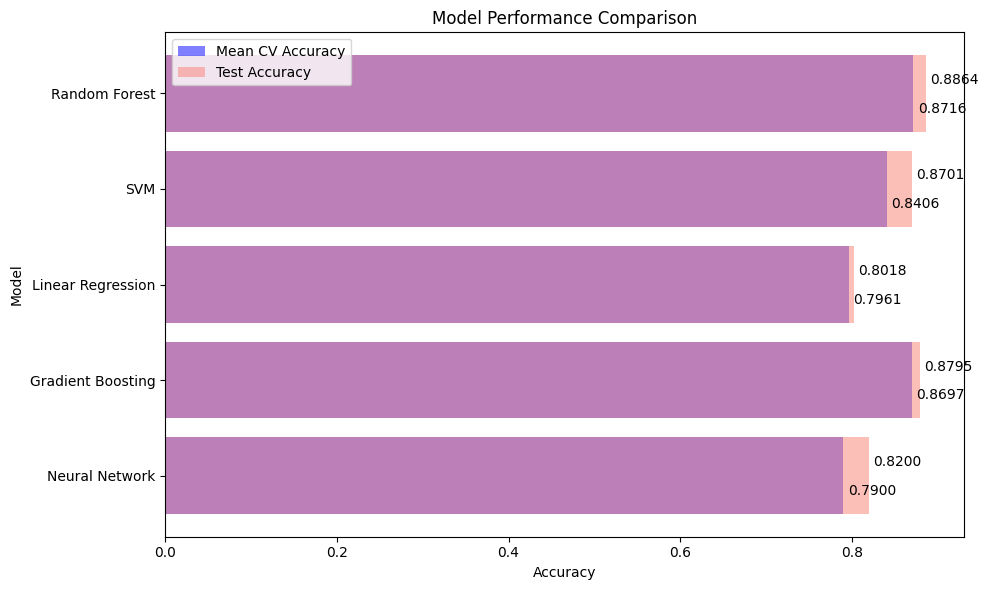

In [ ]:
# Model Performance Comparison

# Ensure the keys are in the same order
sorted_keys = list(mean_cv_accuracies.keys())[::-1]

plt.figure(figsize=(10, 6))

# Plot the mean CV accuracies
plt.barh(sorted_keys, [mean_cv_accuracies[k] for k in sorted_keys], color='blue', label='Mean CV Accuracy', alpha=0.5)

# Plot the test accuracies
plt.barh(sorted_keys, [test_accuracies[k] for k in sorted_keys], color='salmon', label='Test Accuracy', alpha=0.5)

# Add text annotations for mean CV accuracies
for i, key in enumerate(sorted_keys):
    mean_cv_acc = mean_cv_accuracies[key]
    plt.text(mean_cv_acc + 0.005, i - 0.2, f'{mean_cv_acc:.4f}', color='black')

# Add text annotations for test accuracies
for i, key in enumerate(sorted_keys):
    test_acc = test_accuracies[key]
    plt.text(test_acc + 0.005, i + 0.1, f'{test_acc:.4f}', color='black')

plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

## 8.4 Model Evaluation Plots
To further visualize the performance of each model, the following metrics are plotted:

- MSE (Mean Squared Error): Measures the average squared difference between predicted and actual values.
- RMSE (Root Mean Squared Error): Provides the error in the same units as the target variable.
- R-squared: Measures the proportion of variance explained by the model.

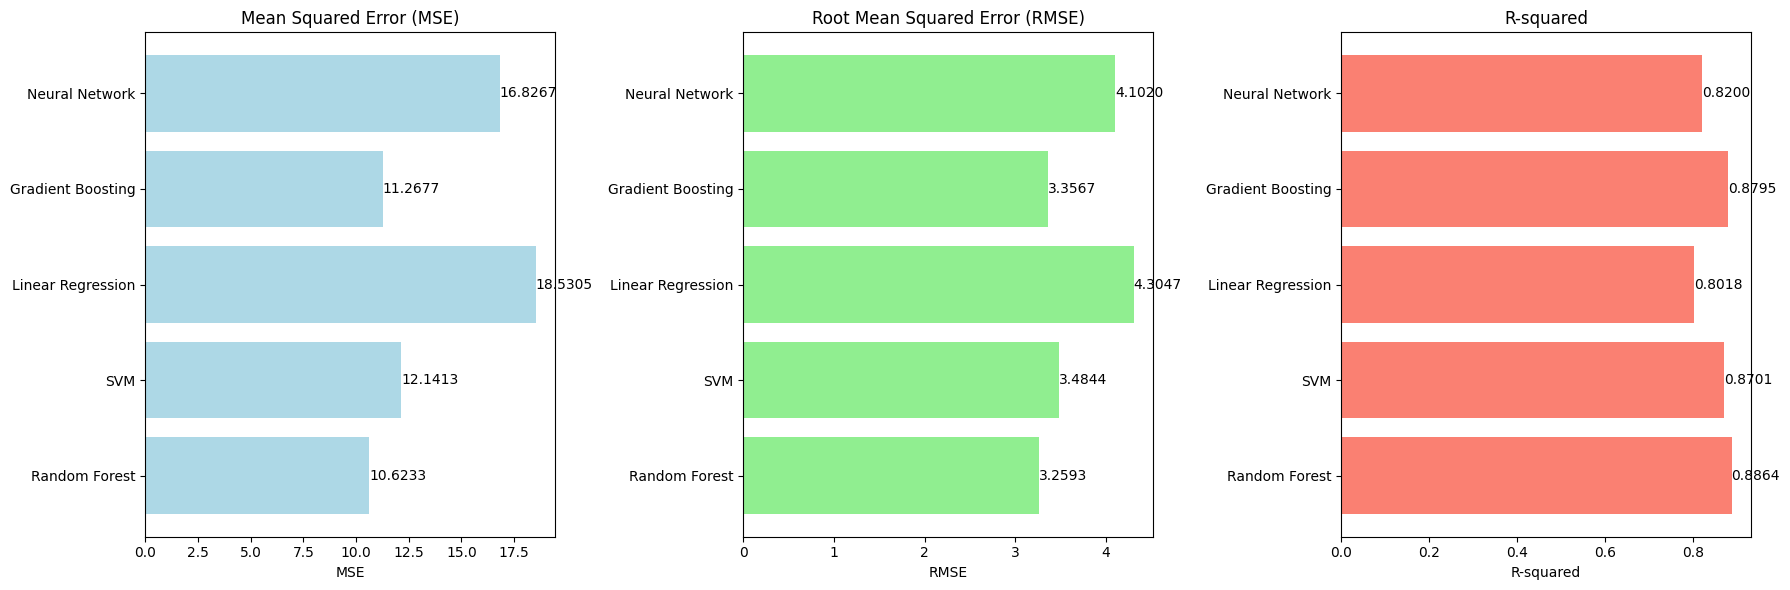

In [ ]:
# Plotting the MSE, RMSE, and R-squared for comparison
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# MSE
bars = ax[0].barh(list(mse_scores.keys()), list(mse_scores.values()), color='lightblue')
ax[0].set_xlabel('MSE')
ax[0].set_title('Mean Squared Error (MSE)')
for bar in bars:
    ax[0].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}',
               va='center', ha='left')

# RMSE
bars = ax[1].barh(list(rmse_scores.keys()), list(rmse_scores.values()), color='lightgreen')
ax[1].set_xlabel('RMSE')
ax[1].set_title('Root Mean Squared Error (RMSE)')
for bar in bars:
    ax[1].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}',
               va='center', ha='left')

# R-squared
bars = ax[2].barh(list(r2_scores.keys()), list(r2_scores.values()), color='salmon')
ax[2].set_xlabel('R-squared')
ax[2].set_title('R-squared')
for bar in bars:
    ax[2].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}',
               va='center', ha='left')

plt.tight_layout()
plt.show()

## 8.5 Selecting the Best Model
The final best model is chosen based on a combination of MSE, RMSE, and R-squared. The model with the lowest MSE, highest R-squared, and overall best balance of these metrics is selected for the final prediction.

The best model based on MSE and Accuracy is: Random Forest

Best Model Performance:
Model: Random Forest
MSE: 10.6233
RMSE: 3.2593
R-squared: 0.8864


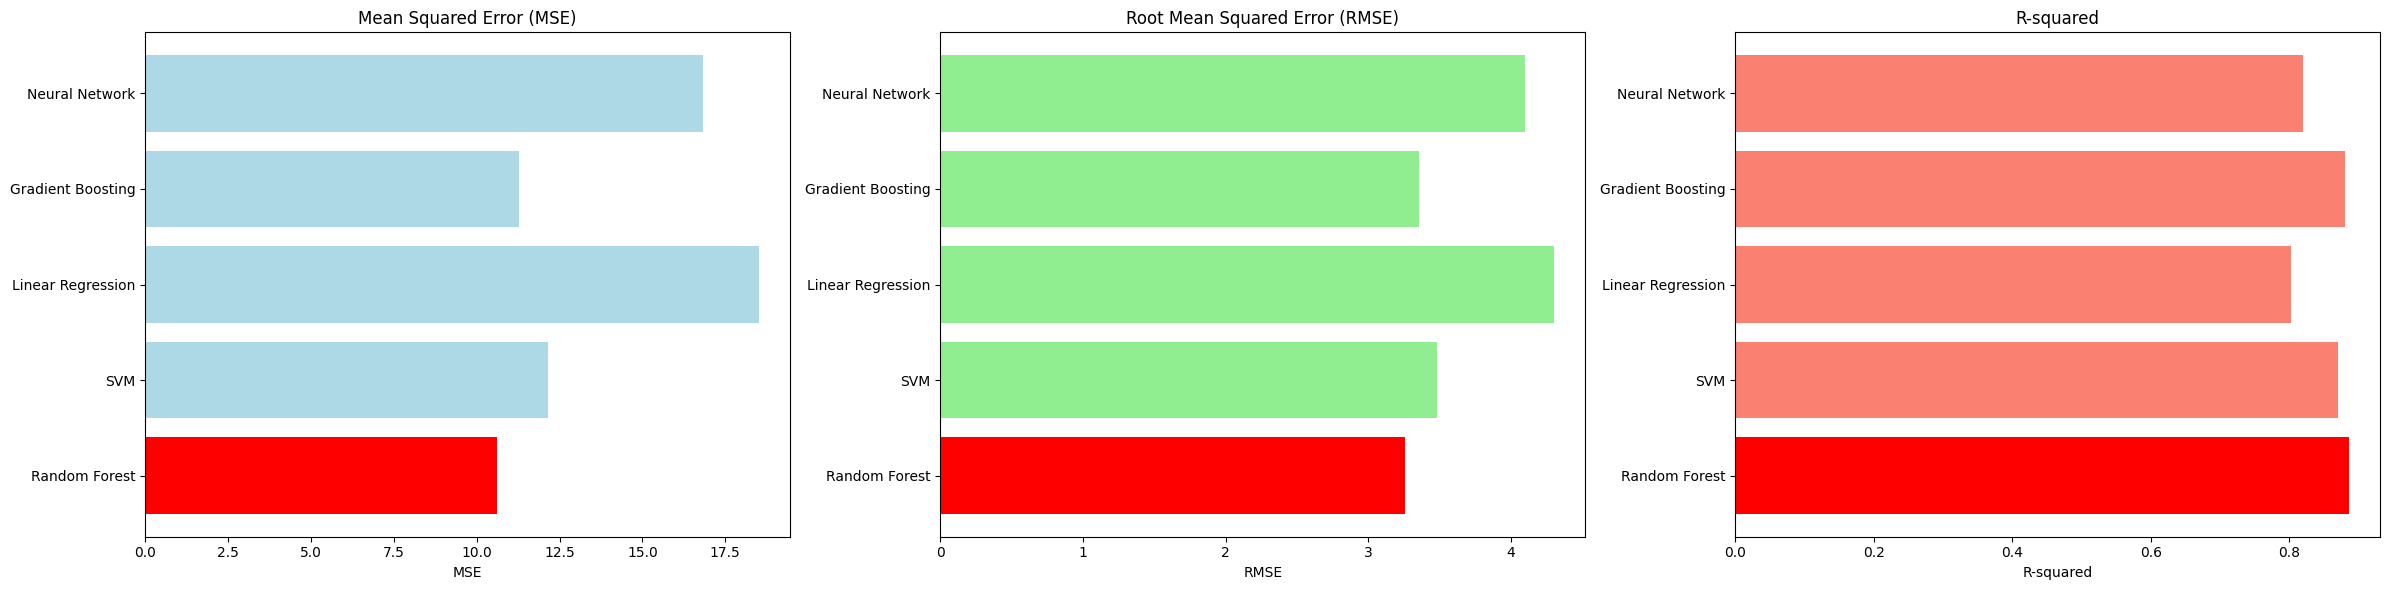

In [ ]:
# Selecting the best model based on MSE, RMSE, and R-squared
best_model_name = None
best_model_score = float('inf')

for model_name in mse_scores.keys():
    # Combining MSE and accuracy for the final score
    score = mse_scores[model_name] * (1 - test_accuracies[model_name])
    if score < best_model_score:
        best_model_score = score
        best_model_name = model_name

# Display the best model
print(f"The best model based on MSE and Accuracy is: {best_model_name}")

# Retrieve the best model
best_model = best_models[best_model_name]

# Display the performance of the best model
y_pred_best = best_model.predict(X_test_pca)

y_pred_best_orig = scaler_y.inverse_transform(y_pred_best.reshape(-1, 1)).ravel()
mse_best = mean_squared_error(y_test_orig, y_pred_best_orig)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test_orig, y_pred_best_orig)

print(f"\nBest Model Performance:")
print(f"Model: {best_model_name}")
print(f"MSE: {mse_best:.4f}")
print(f"RMSE: {rmse_best:.4f}")
print(f"R-squared: {r2_best:.4f}")

# Final plot with the best model's performance highlighted
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

# MSE
colors = ['red' if model == best_model_name else 'lightblue' for model in mse_scores.keys()]
ax[0].barh(list(mse_scores.keys()), list(mse_scores.values()), color=colors)
ax[0].set_xlabel('MSE')
ax[0].set_title('Mean Squared Error (MSE)')

# RMSE
colors = ['red' if model == best_model_name else 'lightgreen' for model in rmse_scores.keys()]
ax[1].barh(list(rmse_scores.keys()), list(rmse_scores.values()), color=colors)
ax[1].set_xlabel('RMSE')
ax[1].set_title('Root Mean Squared Error (RMSE)')

# R-squared
colors = ['red' if model == best_model_name else 'salmon' for model in r2_scores.keys()]
ax[2].barh(list(r2_scores.keys()), list(r2_scores.values()), color=colors)
ax[2].set_xlabel('R-squared')
ax[2].set_title('R-squared')

plt.tight_layout()
plt.show()

**Conclusion**

From our analysis, **Random Forest** emerged as the best model for predicting life expectancy using health and socioeconomic factors. Here’s a summary of the best model’s performance:

**Model**: Random Forest

**Mean Squared Error (MSE)**: 10.6233

**Root Mean Squared Error (RMSE)**: 3.2593

**R-squared (R²)**: 0.8864

**Accuracy**: 0.8716

The Random Forest model balances low error rates (as indicated by MSE and RMSE) with high predictive accuracy and explains a significant proportion of the variance in the outcome variable (high R-squared value). These results suggest that Random Forest is effective at generalizing to unseen data, making it a robust choice for our predictive task.

## 8.6 Saving and Exporting Models for Deployment

In [ ]:
import joblib

# Save the Min-Max scaler X
joblib.dump(scaler_X, 'scaler_X.pkl')
# Save the Min-Max scaler Y
joblib.dump(scaler_y, 'scaler_y.pkl')
# Save the Standard scaler
joblib.dump(scaler, 'standard_scaler.pkl')

# Save the PCA transformer
joblib.dump(pca, 'pca_transformer.pkl')

# Save the best model
joblib.dump(best_model, 'random_forest.pkl')

['random_forest.pkl']

# 9.0 Principal Component Analysis (PCA) and Feature Importance Analysis

- feature_importances = best_model.feature_importances_: This line extracts the feature importance values for the best model (Gradient Boosting). Feature importances represent the relative importance of each feature (or principal component, in this case) in making predictions.

- The plot visualizes which principal components have the highest importance in the model's predictions. It helps identify how much each component contributes to the overall model performance and prediction.

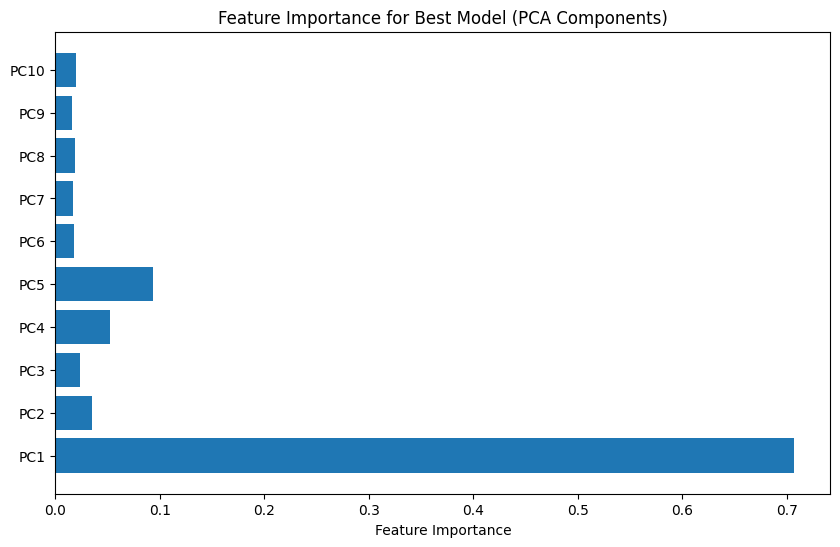

In [ ]:
feature_importances = best_model.feature_importances_

# Plot feature importances for the 10 principal components
plt.figure(figsize=(10, 6))
plt.barh([f'PC{i+1}' for i in range(len(feature_importances))], feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Best Model (PCA Components)')
plt.show()

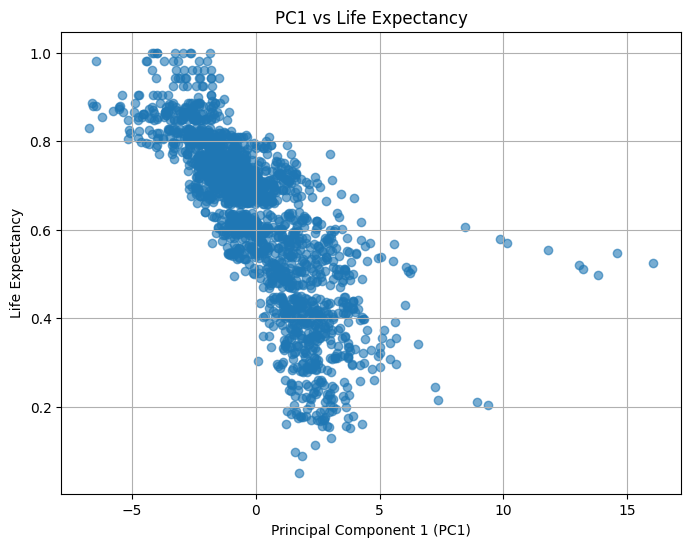

In [ ]:
# Scatter plot of PC1 vs Life Expectancy
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], y_train, alpha=0.6)
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Life Expectancy')
plt.title('PC1 vs Life Expectancy')
plt.grid(True)
plt.show()

This scatter plot helps visualize the relationship between the first principal component and Life Expectancy. It allows us to see if there is any linear or non-linear trend between these two variables, which might inform us about how much PC1 influences Life Expectancy.

In [ ]:
# PCA component loadings (which original features contribute most to PC1)
pca_loadings = pca.components_

# Get the loadings for PC1 (first component)
pc1_loadings = pca_loadings[0]

# Create a DataFrame to visualize which features contribute most to PC1
feature_contributions = pd.DataFrame({'Feature': X.columns, 'PC1 Loading': pc1_loadings})
feature_contributions = feature_contributions.sort_values(by='PC1 Loading', ascending=False)
print(feature_contributions)


                            Feature  PC1 Loading
14               thinness 5-9 years     0.333868
13             thinness  1-19 years     0.332017
6                 under-five deaths     0.258478
1                     infant deaths     0.253345
0                   Adult Mortality     0.235643
5                           Measles     0.152960
10                         HIV/AIDS     0.139752
12                       Population     0.110448
4                       Hepatitis B    -0.137265
8                 Total expenditure    -0.149451
3            percentage expenditure    -0.227153
7                             Polio    -0.235219
11                              GDP    -0.241569
9                        Diphtheria    -0.242308
2                           Alcohol    -0.248141
15  Income composition of resources    -0.314142
16                        Schooling    -0.333491


1. Positive Loadings: Features with positive loadings (such as thinness 5-9 years, thinness 1-19 years, under-five deaths, and infant deaths) are positively correlated with PC1. This means that as the values of these features increase, PC1 also increases.

2. Negative Loadings: Features with negative loadings (such as Income composition of resources, Schooling, GDP, Alcohol, Diphtheria, etc.) are negatively correlated with PC1. As the values of these features increase, PC1 decreases.

3. Magnitude of Loadings: The magnitude of the loadings tells you how strongly each feature influences PC1:
   - Features with larger absolute values (either positive or negative) have a stronger influence on PC1.

   - For instance, Schooling has a loading of -0.333491, which suggests a relatively strong negative correlation with PC1, while thinness 5-9 years with a loading of 0.333868 has a strong positive correlation with PC1.

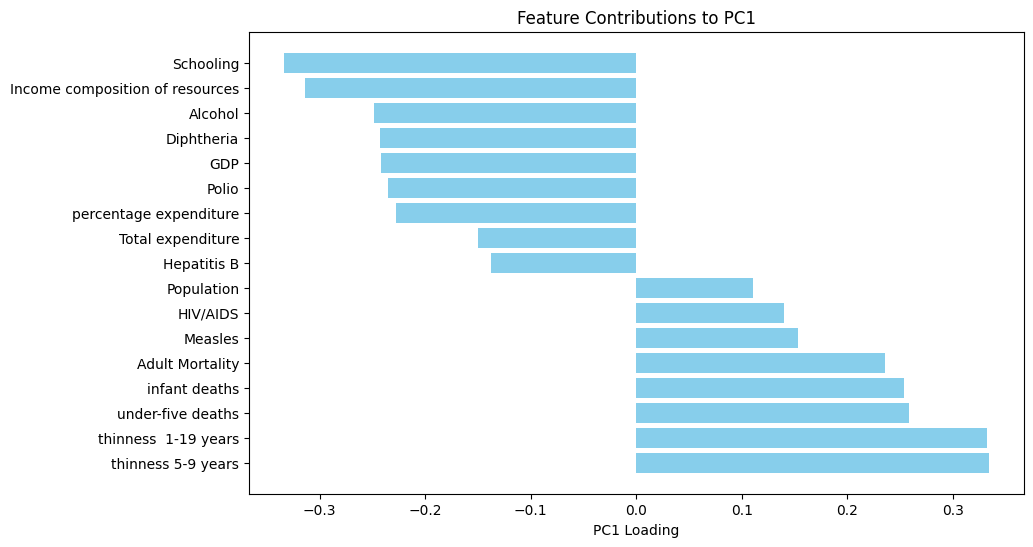

In [ ]:
# Visualizing the loadings of each feature on PC1
plt.figure(figsize=(10, 6))
plt.barh(feature_contributions['Feature'], feature_contributions['PC1 Loading'], color='skyblue')
plt.xlabel('PC1 Loading')
plt.title('Feature Contributions to PC1')
plt.show()


**Key Insights from the Loading:**
- thinness 5-9 years and thinness 1-19 years have the highest positive loadings on PC1, meaning these features contribute strongly to a higher value of PC1. These variables are likely capturing important aspects of health and malnutrition trends related to life expectancy.

- Income composition of resources and Schooling have the highest negative loadings, meaning they are associated with a lower value of PC1. These features relate to economic development and education, and their negative relationship with PC1 might suggest that higher income and schooling are inversely related to the first principal component.

- GDP, Diphtheria, and Polio also have relatively negative loadings, indicating that these features, which are linked to economic and health indicators, negatively influence PC1.


**Interpretation of the Result:**

The **first principal component (PC1)** represents a combination of the following:

- A **positive influence** from **health-related features** like **thinness, under-five deaths**, and **infant deaths**, which are likely reflecting **negative health outcomes** in the population.

- A **negative influence** from **economic and education-related features** such as **income composition, schooling**, and **GDP**, suggesting a relationship where better economic and educational factors might be negatively correlated with the **health challenges** captured by **PC1**.

Thus, PC1 appears to be a health vs. economic factor dimension, where high values of PC1 are associated with poorer health outcomes and low values of PC1 are associated with better economic indicators and schooling.

In [1]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving WIE2003_GroupAssignment_Group15.ipynb to WIE2003_GroupAssignment_Group15.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>